<a href="https://colab.research.google.com/github/priyaking3803-tech/choco-/blob/main/choco_crunch_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

choco crunch analytics


In [1]:
import requests
import pandas as pd
import time
import json
from datetime import datetime

class ChocolateDataExtractor:
    def __init__(self):
        """Initialize the Chocolate Data Extractor"""
        self.base_url = "https://world.openfoodfacts.org/api/v2/search"
        self.target_records = 12000
        self.collected_records = 0
        self.all_data = []

    def make_request(self, page):
        """
        Make API request for a specific page

        Parameters:
        - page: Page number to request
        """
        params = {
            'categories': 'chocolates',
            'fields': 'code,product_name,brands,nutriments',
            'page_size': 100,
            'page': page
        }

        try:
            response = requests.get(self.base_url, params=params)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error making request for page {page}: {e}")
            return None

    def extract_product_data(self, product):
        """
        Extract relevant fields from product data

        Parameters:
        - product: Raw product data from API
        """
        return {
            'code': product.get('code'),
            'product_name': product.get('product_name'),
            'brands': product.get('brands'),
            'nutriments': product.get('nutriments', {})
        }

    def collect_data(self):
        """Collect chocolate product data using pagination"""
        page = 1

        print("Starting data collection...")
        start_time = time.time()

        while self.collected_records < self.target_records:
            print(f"Fetching page {page}...")

            # Make API request
            response_data = self.make_request(page)

            if not response_data or 'products' not in response_data:
                print(f"No more data available or error on page {page}")
                break

            # Process products from current page
            for product in response_data['products']:
                if self.collected_records >= self.target_records:
                    break

                processed_product = self.extract_product_data(product)
                self.all_data.append(processed_product)
                self.collected_records += 1

                # Progress update
                if self.collected_records % 1000 == 0:
                    print(f"Collected {self.collected_records} records...")

            # Add delay to avoid overwhelming the API
            time.sleep(1)
            page += 1

        end_time = time.time()
        duration = round(end_time - start_time, 2)
        print(f"\nData collection completed!")
        print(f"Total records collected: {self.collected_records}")
        print(f"Time taken: {duration} seconds")

    def save_to_json(self, filename=None):
        """Save collected data to JSON file"""
        if not filename:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            filename = f'chocolate_data_{timestamp}.json'

        try:
            with open(filename, 'w', encoding='utf-8') as f:
                json.dump(self.all_data, f, indent=4, ensure_ascii=False)
            print(f"Data saved to {filename}")
        except Exception as e:
            print(f"Error saving to JSON: {e}")

    def save_to_csv(self, filename=None):
        """Save collected data to CSV file"""
        if not filename:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            filename = f'chocolate_data_{timestamp}.csv'

        try:
            # Create a normalized dataframe
            normalized_data = []
            for product in self.all_data:
                product_data = {
                    'code': product['code'],
                    'product_name': product['product_name'],
                    'brands': product['brands']
                }

                # Add nutriments fields
                for key, value in product['nutriments'].items():
                    product_data[f'nutriments.{key}'] = value

                normalized_data.append(product_data)

            df = pd.DataFrame(normalized_data)
            df.to_csv(filename, index=False)
            print(f"Data saved to {filename}")

            # Print data summary
            print("\nData Summary:")
            print(f"Total rows: {len(df)}")
            print(f"Total columns: {len(df.columns)}")
            print("\nMissing values summary:")
            print(df.isnull().sum().sort_values(ascending=False).head())

        except Exception as e:
            print(f"Error saving to CSV: {e}")

    def analyze_data(self):
        """Perform basic analysis on collected data"""
        if not self.all_data:
            print("No data to analyze")
            return

        # Convert to DataFrame for analysis
        df = pd.json_normalize(self.all_data)

        print("\nData Analysis:")
        print("-" * 50)

        # Brand analysis
        print("\nTop 10 Brands by Product Count:")
        brand_counts = df['brands'].value_counts().head(10)
        print(brand_counts)

        # Nutriment analysis
        if 'nutriments.energy_100g' in df.columns:
            print("\nEnergy Content Statistics (per 100g):")
            print(df['nutriments.energy_100g'].describe())

        if 'nutriments.proteins_100g' in df.columns:
            print("\nProtein Content Statistics (per 100g):")
            print(df['nutriments.proteins_100g'].describe())

def main():
    # Initialize extractor
    extractor = ChocolateDataExtractor()

    # Collect data
    extractor.collect_data()

    # Save data
    extractor.save_to_json('chocolate_data.json')
    extractor.save_to_csv('chocolate_data.csv')

    # Analyze data
    extractor.analyze_data()

if __name__ == "__main__":
    main()

Starting data collection...
Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Collected 1000 records...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Collected 2000 records...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Collected 3000 records...
Fetching page 32...
Fetching page 33...
Fetching page 34...
Fetching page 35...
Fetching page 36...
Fetching page 37...
Fetching page 38...
Fetching page 39...
Fetching page 40...
Fetching page 41...
Collected 4000 records...
Fetching page 42...
Fetching page 43...
Fetching page 44.

/tmp/ipython-input-3914891495.py:15: DtypeWarning: Columns (75,96,101,111,113,120,125,130,135,137,141,146,149,151,152,155,156,158,160,163,165,169,171,183,189,195,201,235,305,306,307,317,325,329,337,338,339,340,341,342,343,344,352,354,361,362,363,365,366,369,374,375,379,380,382,383,390,391,392,393,394,395,396,397,398,401,403,449,450,451,452,453,454,457,461,463,464,465,466,467,470,471,475,477,479,480,485,488,490,495,498,502,508,509,510,513,517,518,522,526,528,546,553,555,556,560,565,567,571,576,581,583,587,592,593,598,600,601,602,603,604,607,609,615,619,620,626,627,630,632,634,638,643,645,651,658,667,671,673,677,679,683,685,689,693,695,697,698,699,704,706,707,708,709,714,716,726,731,733,737,739,743,745,749,754,755,758,775,778,780,784,786,788,798,800,803,805,809,811,816,822,827,831,833,837,839,843,845,849,851,855,857,861,863,867,869,873,875,880,885,887,888,900,901,905,907,911,912,918,919,922,924,928,930,934,936,938,941,942,946,948,952,954,961,966,971,976,980,981,985,986,990,992,996,998,10

Dataset loaded with shape: (12000, 1433)
Starting data cleaning process...

Missing Values Summary:
--------------------------------------------------
                                                    Missing Values  \
nutriments.fruits-vegetables-nuts-estimate_prep...           12000   
nutriments.alpha-linolenic-acid_modifier                     11999   
nutriments.es-betaglucanos_serving                           11999   
nutriments.es-betaglucanos_unit                              11999   
nutriments.es-betaglucanos_value                             11999   
...                                                            ...   
nutriments.fruits-vegetables-nuts-estimate-from...             675   
nutriments.fruits-vegetables-legumes-estimate-f...             675   
nutriments.fruits-vegetables-nuts-estimate-from...             673   
brands                                                         636   
product_name                                                   527   

        

/tmp/ipython-input-3914891495.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


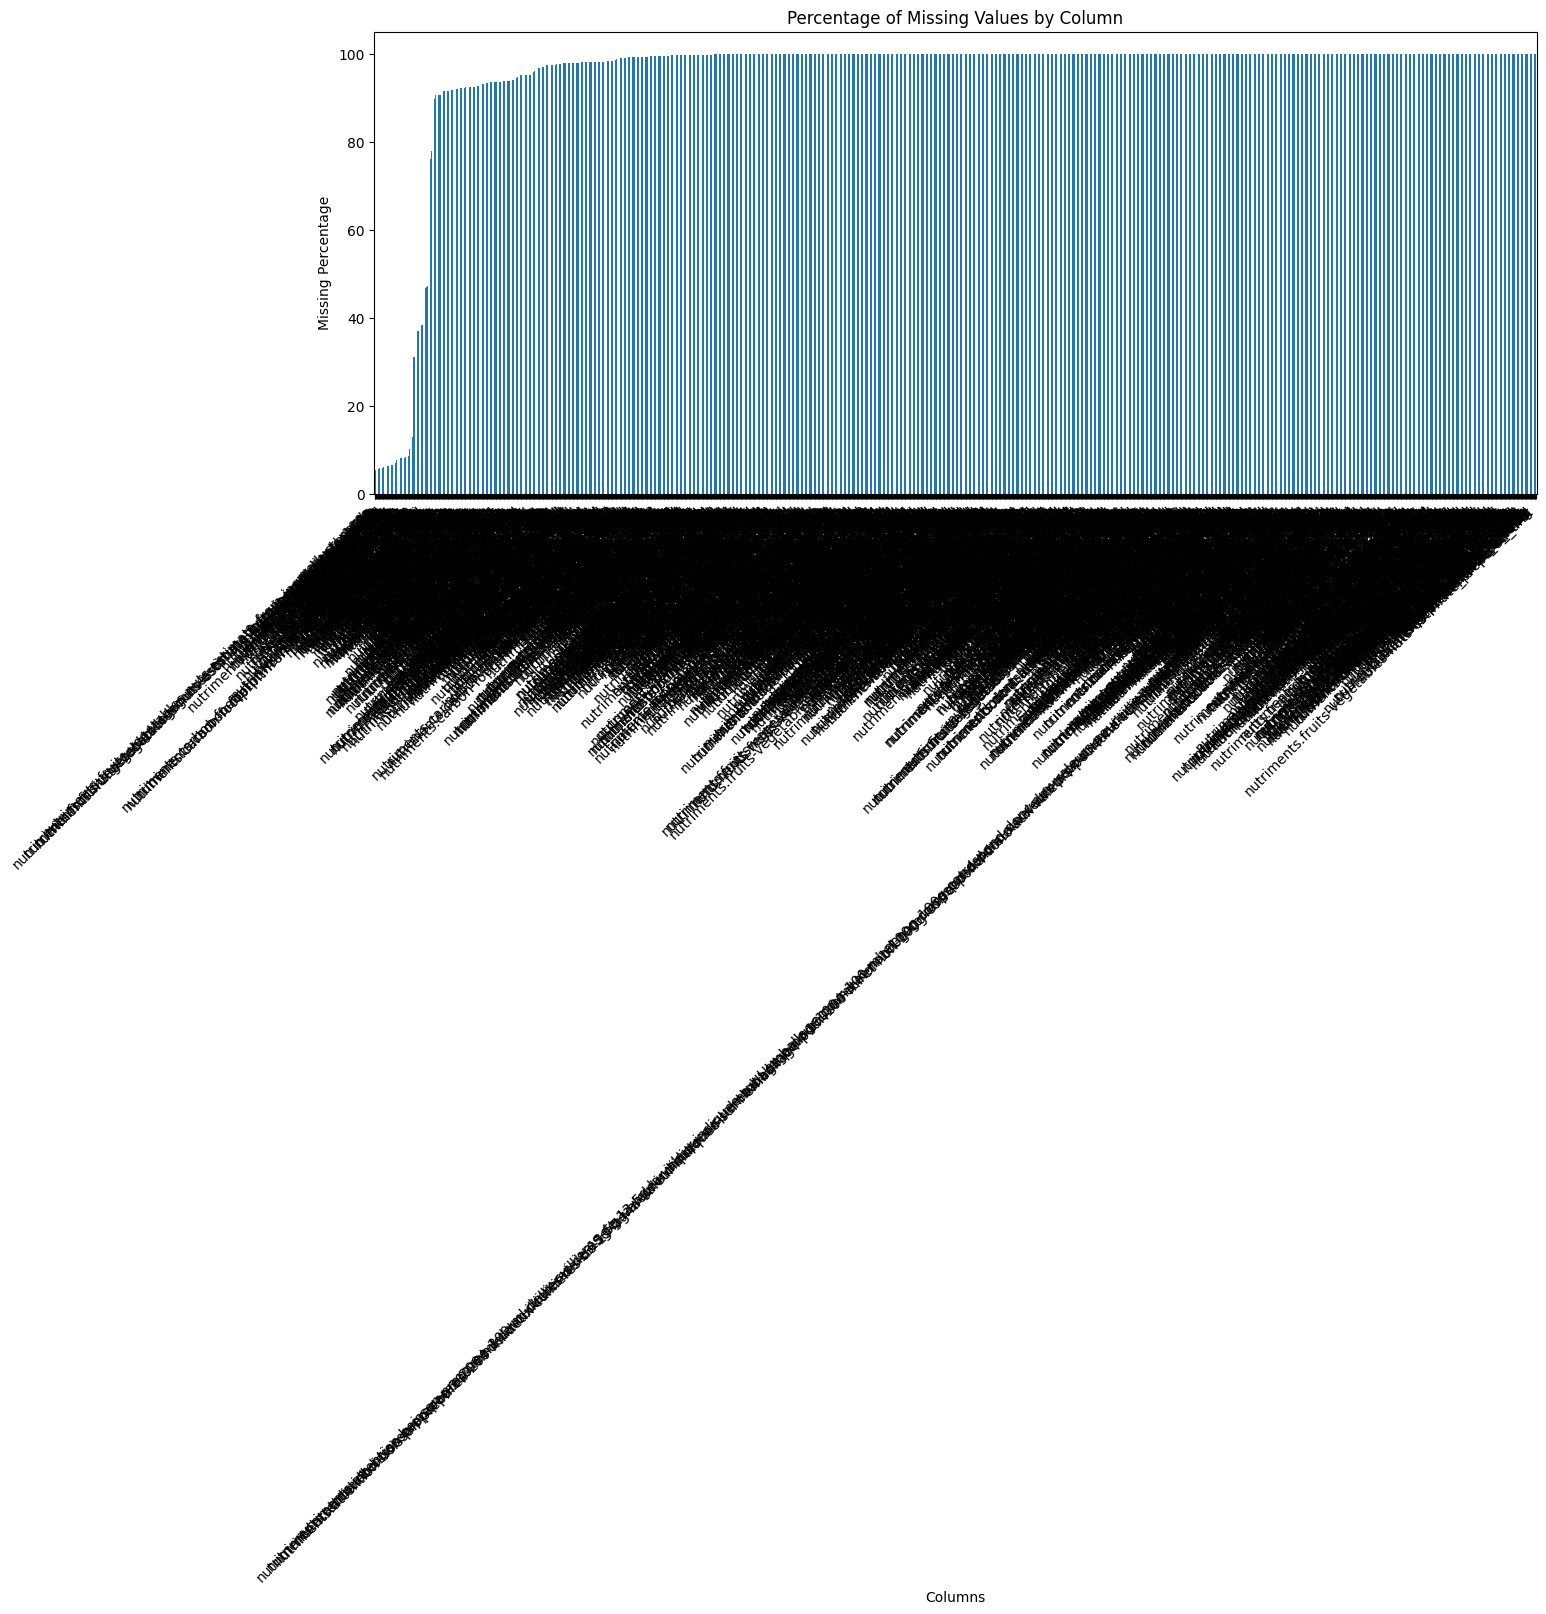


Columns to drop (>50.0% missing):
- nutriments.energy-kj_serving: 63.90% missing
- nutriments.fiber_serving: 50.81% missing
- nutriments.calcium: 89.60% missing
- nutriments.calcium_100g: 89.72% missing
- nutriments.calcium_label: 95.95% missing
- nutriments.calcium_serving: 91.88% missing
- nutriments.calcium_unit: 89.58% missing
- nutriments.calcium_value: 89.60% missing
- nutriments.fat_label: 99.98% missing
- nutriments.chloride: 99.14% missing
- nutriments.chloride_100g: 99.17% missing
- nutriments.chloride_unit: 99.14% missing
- nutriments.chloride_value: 99.14% missing
- nutriments.magnesium: 90.62% missing
- nutriments.magnesium_100g: 90.75% missing
- nutriments.magnesium_unit: 90.62% missing
- nutriments.magnesium_value: 90.62% missing
- nutriments.potassium: 95.62% missing
- nutriments.potassium_100g: 95.70% missing
- nutriments.potassium_unit: 95.58% missing
- nutriments.potassium_value: 95.62% missing
- nutriments.alcohol: 93.63% missing
- nutriments.alcohol_100g: 93.63% m

/tmp/ipython-input-3914891495.py:101: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(median_value, inplace=True)
/tmp/ipython-input-3914891495.py:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

               code  nutriments.carbohydrates  nutriments.carbohydrates_100g  \
count  1.200000e+04              12000.000000                   12000.000000   
mean   4.529883e+12                 28.357812                      30.420903   
std    2.393425e+12                 90.927050                      91.019118   
min    1.816600e+04                  0.000000                       0.000000   
25%    3.229821e+12                  4.900000                       5.000000   
50%    4.088600e+12                 15.000000                      18.000000   
75%    6.111184e+12                 52.825000                      56.000000   
max    9.557129e+12               8989.000000                    8989.000000   

       nutriments.carbohydrates_serving  nutriments.carbohydrates_value  \
count                      12000.000000                    12000.000000   
mean                          16.930211                       28.357812   
std                           29.249403               

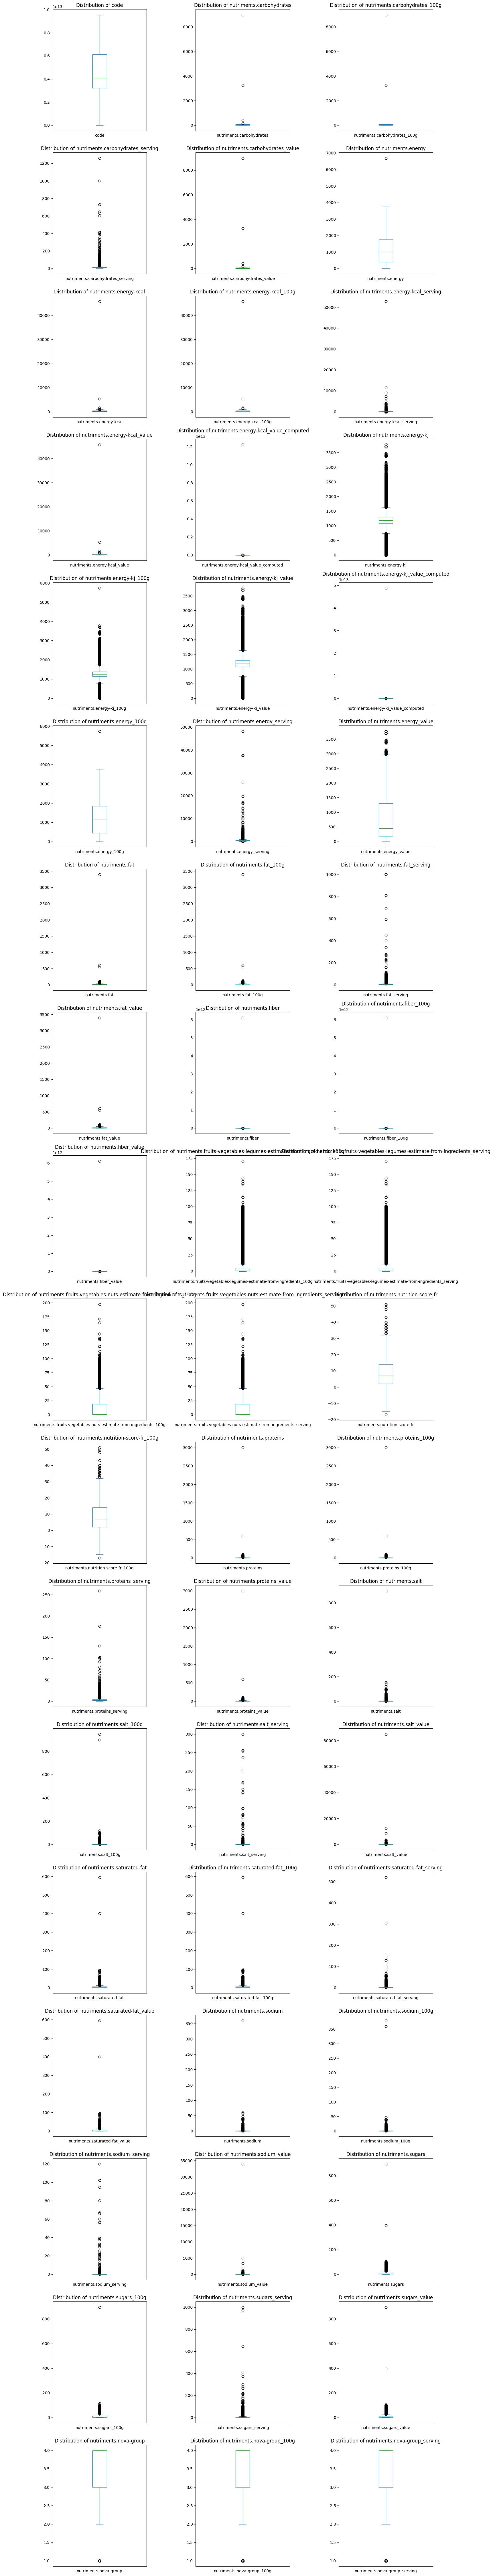


Data cleaning completed!
Original shape: (12000, 1433)
Final shape: (12000, 67)

Cleaned data saved to: cleaned_chocolate_data.csv

Sample of cleaned data:
            code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                 brands  nutriments.carbohydrates  \
0                                maroc.                      42.0   
1                                 perly                       9.4   
2                              sidi ali                      15.0   
3  Les Eaux Minérales d'oulmès,Sidi Ali                      15.0   
4                              AQUAFINA                       0.0   

   nutriments.carbohydrates_100g  nutriments.carbohydrates_serving  \
0                            4.2                              42.0   
1                      

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Union

class ChocolateDataCleaner:
    def __init__(self, file_path: str):
        """
        Initialize the data cleaner with the dataset

        Parameters:
        - file_path: Path to the CSV file containing chocolate data
        """
        self.df = pd.read_csv(file_path)
        self.original_shape = self.df.shape
        print(f"Dataset loaded with shape: {self.original_shape}")

    def explore_missing_values(self) -> None:
        """Explore missing values in the dataset"""
        # Calculate missing values
        missing_values = self.df.isnull().sum()
        missing_percentages = (missing_values / len(self.df)) * 100

        # Create missing values summary
        missing_info = pd.DataFrame({
            'Missing Values': missing_values,
            'Missing Percentage': missing_percentages
        })
        missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(
            'Missing Percentage', ascending=False
        )

        print("\nMissing Values Summary:")
        print("-" * 50)
        print(missing_info)

        # Visualize missing values
        self._plot_missing_values(missing_percentages)


    def _plot_missing_values(self, missing_percentages: pd.Series) -> None:
        """
        Create visualization of missing values

        Parameters:
        - missing_percentages: Series containing missing value percentages
        """
        plt.figure(figsize=(15, 6))
        missing_percentages[missing_percentages > 0].sort_values(ascending=True).plot(
            kind='bar'
        )
        plt.title('Percentage of Missing Values by Column')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def identify_columns_to_drop(self, threshold: float = 50.0) -> List[str]:
        """
        Identify columns to drop based on missing value percentage

        Parameters:
        - threshold: Percentage threshold for dropping columns (default: 50%)

        Returns:
        - List of columns to drop
        """
        missing_percentages = (self.df.isnull().sum() / len(self.df)) * 100
        columns_to_drop = missing_percentages[missing_percentages > threshold].index.tolist()

        print(f"\nColumns to drop (>{threshold}% missing):")
        for col in columns_to_drop:
            print(f"- {col}: {missing_percentages[col]:.2f}% missing")

        return columns_to_drop

    def drop_high_null_columns(self, threshold: float = 50.0) -> None:
        """
        Drop columns with high percentage of null values

        Parameters:
        - threshold: Percentage threshold for dropping columns (default: 50%)
        """
        columns_to_drop = self.identify_columns_to_drop(threshold)
        self.df = self.df.drop(columns=columns_to_drop)
        print(f"\nDropped {len(columns_to_drop)} columns")
        print(f"New shape: {self.df.shape}")

    def handle_missing_values(self) -> None:
        """Handle missing values in remaining columns"""
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        categorical_columns = self.df.select_dtypes(exclude=[np.number]).columns

        # Handle numeric columns
        for col in numeric_columns:
            if self.df[col].isnull().sum() > 0:
                # Use median for numeric columns
                median_value = self.df[col].median()
                self.df[col].fillna(median_value, inplace=True)
                print(f"Filled missing values in {col} with median: {median_value}")

        # Handle categorical columns
        for col in categorical_columns:
            if self.df[col].isnull().sum() > 0:
                # Use mode for categorical columns
                mode_value = self.df[col].mode()[0]
                self.df[col].fillna(mode_value, inplace=True)
                print(f"Filled missing values in {col} with mode: {mode_value}")

    def analyze_data_types(self) -> None:
        """Analyze data types of columns"""
        print("\nData Types Analysis:")
        print("-" * 50)
        print(self.df.dtypes.value_counts())
        print("\nDetailed Data Types:")
        print(self.df.dtypes)

    def check_duplicates(self) -> None:
        """Check for duplicate records"""
        duplicates = self.df.duplicated().sum()
        print(f"\nNumber of duplicate records: {duplicates}")
        if duplicates > 0:
            self.df.drop_duplicates(inplace=True)
            print(f"Dropped {duplicates} duplicate records")

    def analyze_numerical_columns(self) -> None:
        """Analyze numerical columns statistics"""
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns

        print("\nNumerical Columns Statistics:")
        print("-" * 50)
        print(self.df[numeric_columns].describe())

        # Create box plots for numerical columns
        self._plot_numerical_distributions(numeric_columns)

    def _plot_numerical_distributions(self, numeric_columns: List[str]) -> None:
        """
        Create box plots for numerical columns

        Parameters:
        - numeric_columns: List of numerical column names
        """
        n_cols = 3
        n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

        plt.figure(figsize=(15, 5 * n_rows))
        for i, col in enumerate(numeric_columns, 1):
            plt.subplot(n_rows, n_cols, i)
            self.df[col].plot(kind='box')
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

    def clean_data(self, null_threshold: float = 50.0) -> pd.DataFrame:
        """
        Perform complete data cleaning process

        Parameters:
        - null_threshold: Threshold for dropping columns (default: 50%)

        Returns:
        - Cleaned DataFrame
        """
        print("Starting data cleaning process...")

        # Step 1: Explore missing values
        self.explore_missing_values()

        # Step 2: Drop columns with high null values
        self.drop_high_null_columns(null_threshold)

        # Step 3: Handle remaining missing values
        self.handle_missing_values()

        # Step 4: Check and remove duplicates
        self.check_duplicates()

        # Step 5: Analyze data types
        self.analyze_data_types()

        # Step 6: Analyze numerical columns
        self.analyze_numerical_columns()

        print("\nData cleaning completed!")
        print(f"Original shape: {self.original_shape}")
        print(f"Final shape: {self.df.shape}")

        return self.df

    def save_cleaned_data(self, output_path: str) -> None:
        """
        Save cleaned data to CSV file

        Parameters:
        - output_path: Path where cleaned data will be saved
        """
        self.df.to_csv(output_path, index=False)
        print(f"\nCleaned data saved to: {output_path}")

def main():
    # Initialize data cleaner
    cleaner = ChocolateDataCleaner('chocolate_data.csv')

    # Clean data
    cleaned_df = cleaner.clean_data(null_threshold=50.0)

    # Save cleaned data
    cleaner.save_cleaned_data('cleaned_chocolate_data.csv')

    # Print sample of cleaned data
    print("\nSample of cleaned data:")
    print(cleaned_df.head())

if __name__ == "__main__":
    main()

/tmp/ipython-input-3914891495.py:15: DtypeWarning: Columns (75,96,101,111,113,120,125,130,135,137,141,146,149,151,152,155,156,158,160,163,165,169,171,183,189,195,201,235,305,306,307,317,325,329,337,338,339,340,341,342,343,344,352,354,361,362,363,365,366,369,374,375,379,380,382,383,390,391,392,393,394,395,396,397,398,401,403,449,450,451,452,453,454,457,461,463,464,465,466,467,470,471,475,477,479,480,485,488,490,495,498,502,508,509,510,513,517,518,522,526,528,546,553,555,556,560,565,567,571,576,581,583,587,592,593,598,600,601,602,603,604,607,609,615,619,620,626,627,630,632,634,638,643,645,651,658,667,671,673,677,679,683,685,689,693,695,697,698,699,704,706,707,708,709,714,716,726,731,733,737,739,743,745,749,754,755,758,775,778,780,784,786,788,798,800,803,805,809,811,816,822,827,831,833,837,839,843,845,849,851,855,857,861,863,867,869,873,875,880,885,887,888,900,901,905,907,911,912,918,919,922,924,928,930,934,936,938,941,942,946,948,952,954,961,966,971,976,980,981,985,986,990,992,996,998,10

Dataset loaded with shape: (12000, 1433)

Missing Values Summary:
--------------------------------------------------
                                                    Missing Values  \
nutriments.fruits-vegetables-nuts-estimate_prep...           12000   
nutriments.alpha-linolenic-acid_modifier                     11999   
nutriments.es-betaglucanos_serving                           11999   
nutriments.es-betaglucanos_unit                              11999   
nutriments.es-betaglucanos_value                             11999   
...                                                            ...   
nutriments.fruits-vegetables-nuts-estimate-from...             675   
nutriments.fruits-vegetables-legumes-estimate-f...             675   
nutriments.fruits-vegetables-nuts-estimate-from...             673   
brands                                                         636   
product_name                                                   527   

                                          

/tmp/ipython-input-3914891495.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


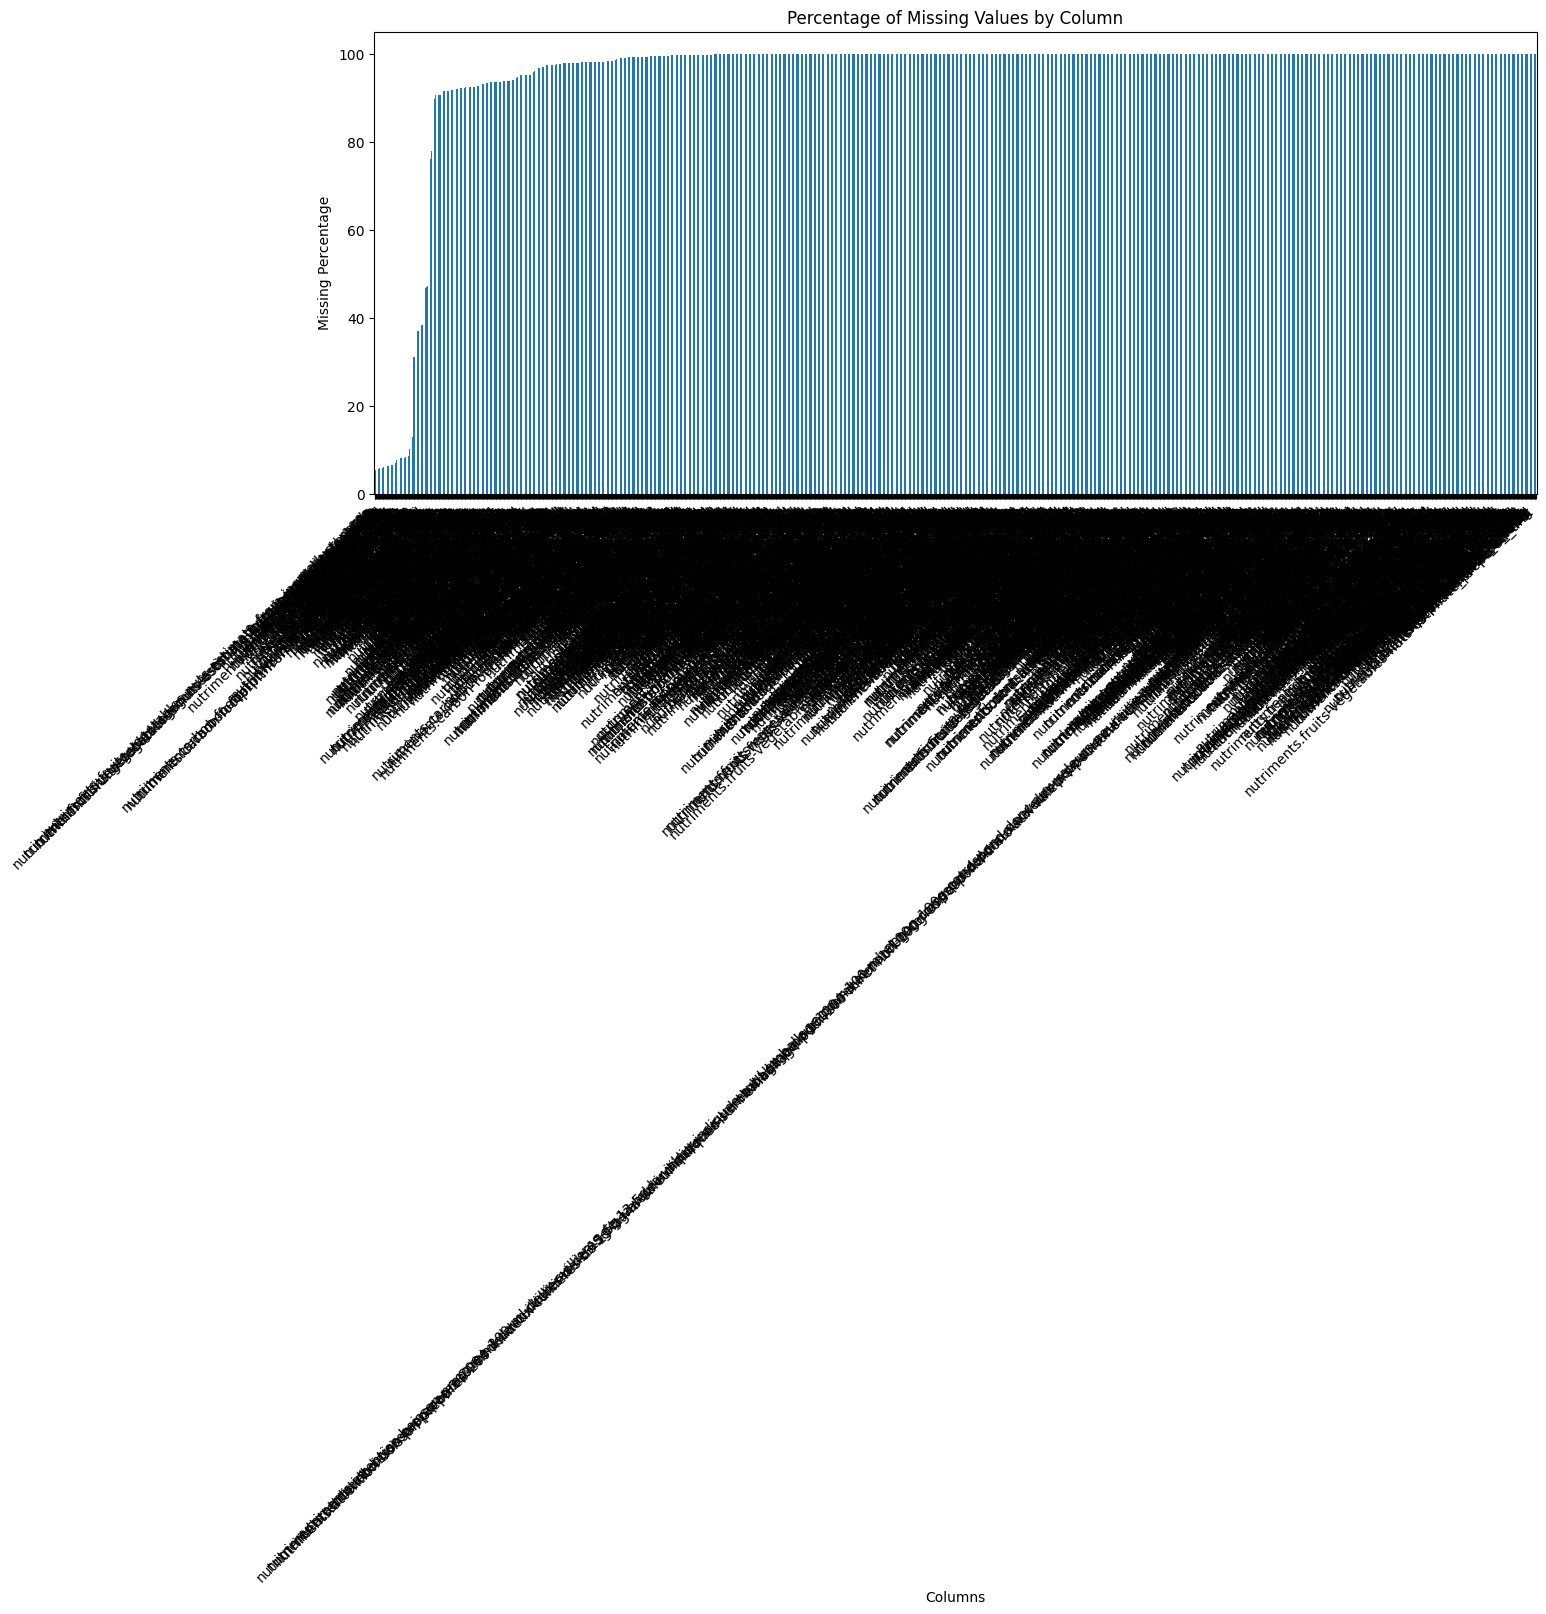


Columns to drop (>50.0% missing):
- nutriments.energy-kj_serving: 63.90% missing
- nutriments.fiber_serving: 50.81% missing
- nutriments.calcium: 89.60% missing
- nutriments.calcium_100g: 89.72% missing
- nutriments.calcium_label: 95.95% missing
- nutriments.calcium_serving: 91.88% missing
- nutriments.calcium_unit: 89.58% missing
- nutriments.calcium_value: 89.60% missing
- nutriments.fat_label: 99.98% missing
- nutriments.chloride: 99.14% missing
- nutriments.chloride_100g: 99.17% missing
- nutriments.chloride_unit: 99.14% missing
- nutriments.chloride_value: 99.14% missing
- nutriments.magnesium: 90.62% missing
- nutriments.magnesium_100g: 90.75% missing
- nutriments.magnesium_unit: 90.62% missing
- nutriments.magnesium_value: 90.62% missing
- nutriments.potassium: 95.62% missing
- nutriments.potassium_100g: 95.70% missing
- nutriments.potassium_unit: 95.58% missing
- nutriments.potassium_value: 95.62% missing
- nutriments.alcohol: 93.63% missing
- nutriments.alcohol_100g: 93.63% m

/tmp/ipython-input-3914891495.py:101: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(median_value, inplace=True)
/tmp/ipython-input-3914891495.py:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

               code  nutriments.carbohydrates  nutriments.carbohydrates_100g  \
count  1.200000e+04              12000.000000                   12000.000000   
mean   4.529883e+12                 28.357812                      30.420903   
std    2.393425e+12                 90.927050                      91.019118   
min    1.816600e+04                  0.000000                       0.000000   
25%    3.229821e+12                  4.900000                       5.000000   
50%    4.088600e+12                 15.000000                      18.000000   
75%    6.111184e+12                 52.825000                      56.000000   
max    9.557129e+12               8989.000000                    8989.000000   

       nutriments.carbohydrates_serving  nutriments.carbohydrates_value  \
count                      12000.000000                    12000.000000   
mean                          16.930211                       28.357812   
std                           29.249403               

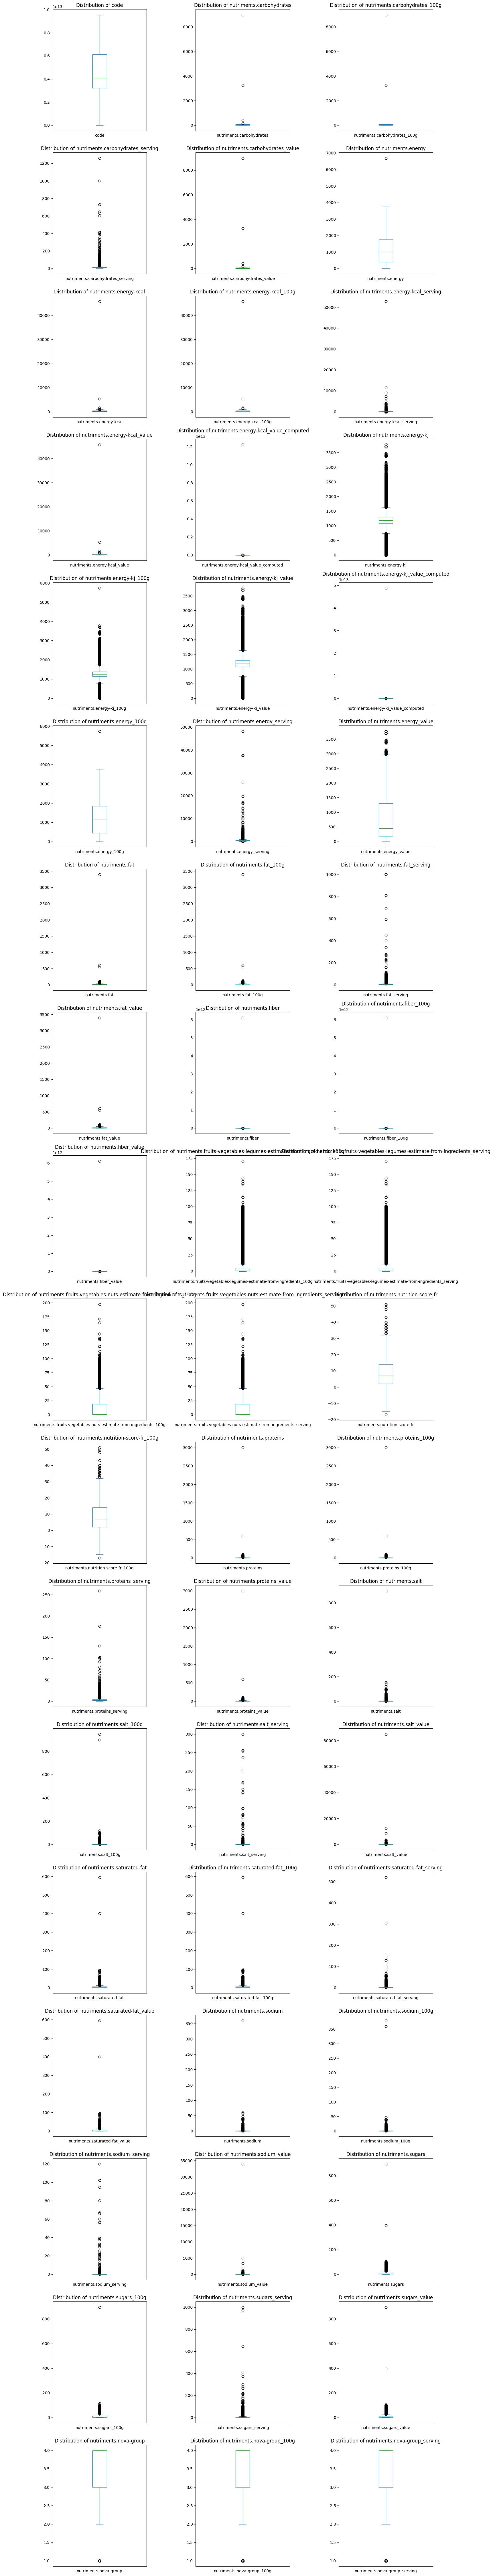

In [3]:
#Missing Values Analysis:
# Example usage
cleaner = ChocolateDataCleaner('chocolate_data.csv')
missing_info = cleaner.explore_missing_values()
#Handling High-Null Columns:
# Drop columns with more than 50% missing values
cleaner.drop_high_null_columns(threshold=50.0)
##Missing Values Treatment:
# Handle remaining missing values
cleaner.handle_missing_values()
#Data Analysis:
# Analyze data types and numerical distributions
cleaner.analyze_data_types()
cleaner.analyze_numerical_columns()

Starting feature engineering process...
Sugar to carbohydrate ratio statistics:
count    11320.000000
mean         0.491578
std          0.374643
min          0.000000
25%          0.110164
50%          0.418182
75%          0.908111
max          1.000000
Name: sugar_to_carb_ratio, dtype: float64

Calorie category distribution:
calorie_category
Low         7194
Moderate    3069
High        1737
Name: count, dtype: int64

Sugar category distribution:
sugar_category
Low Sugar         7295
Moderate Sugar    2892
High Sugar        1813
Name: count, dtype: int64

Ultra-processed products distribution:
is_ultra_processed
Yes    7548
No     4452
Name: count, dtype: int64


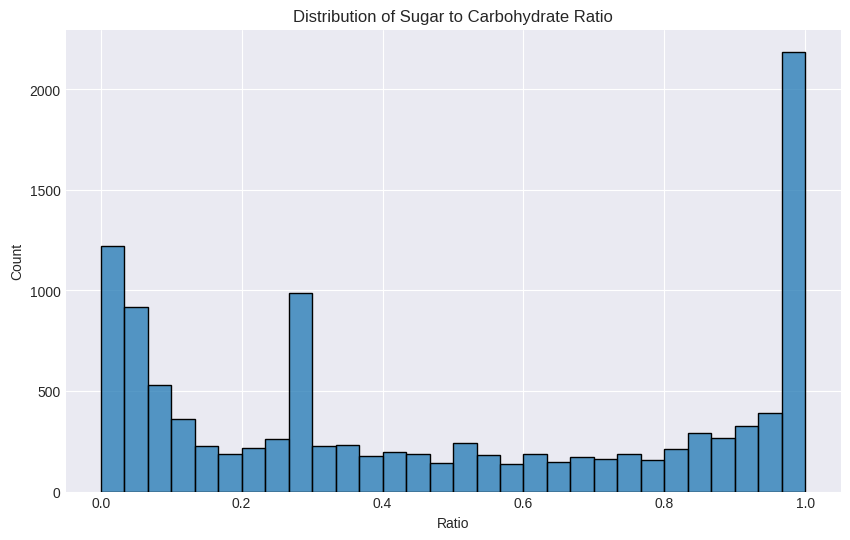

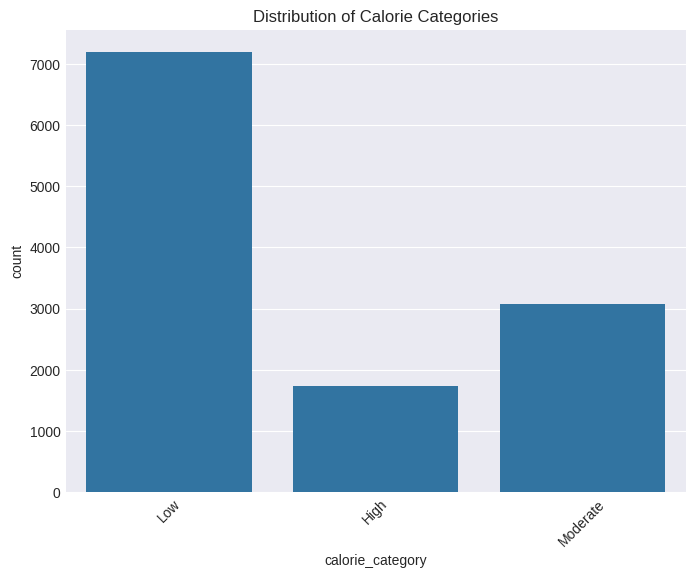

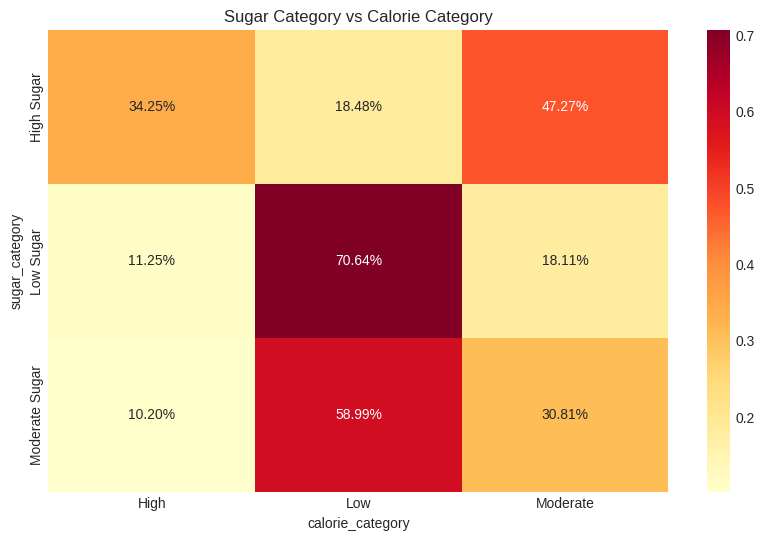

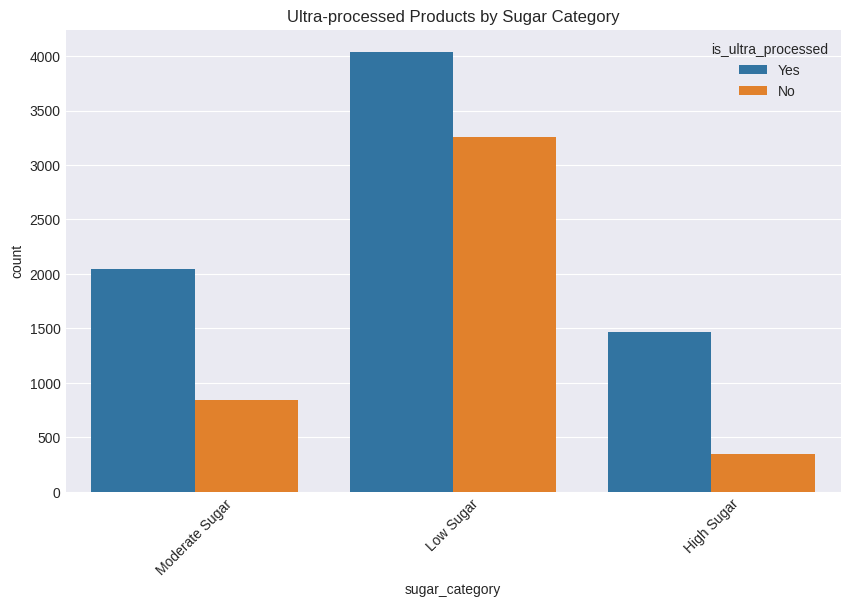

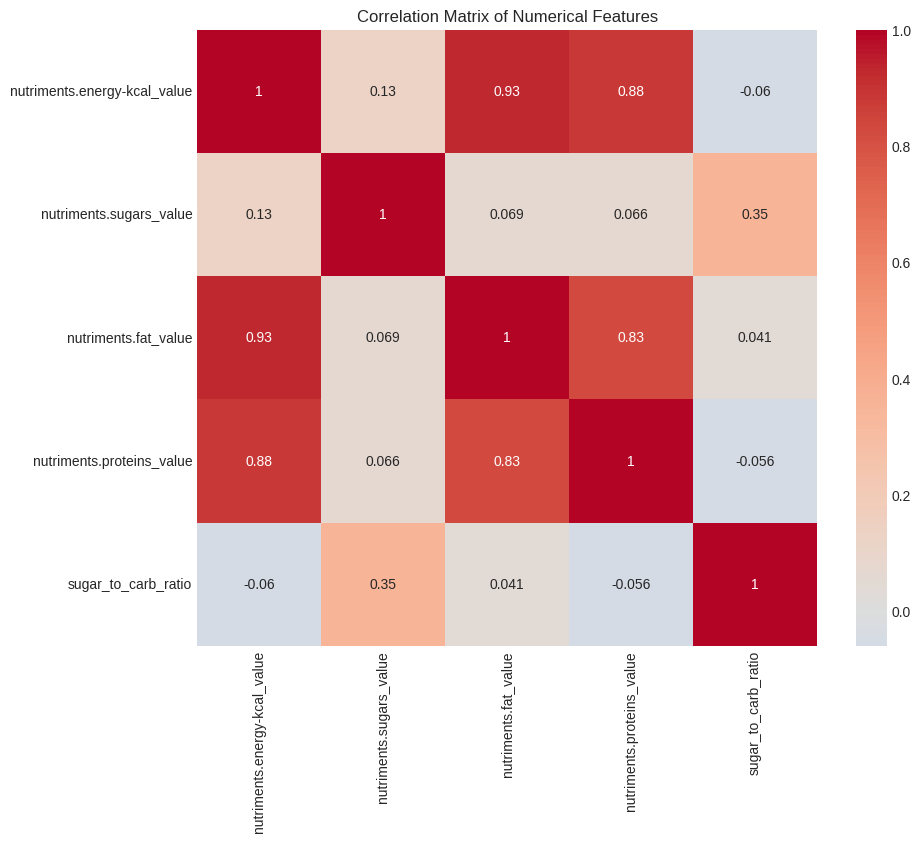


Feature engineering completed!

New columns added:
- sugar_to_carb_ratio
- calorie_category
- sugar_category
- is_ultra_processed

Engineered data saved to: engineered_chocolate_data.csv

Sample of engineered data:
   sugar_to_carb_ratio calorie_category  sugar_category is_ultra_processed
0             0.333333              Low  Moderate Sugar                Yes
1             0.436170              Low       Low Sugar                Yes
2             0.273333              Low       Low Sugar                 No
3             0.273333              Low       Low Sugar                 No
4                  NaN              Low       Low Sugar                Yes


In [4]:
import pandas as pd
import numpy as np
from typing import List, Dict
import matplotlib.pyplot as plt
import seaborn as sns


class ChocolateFeatureEngineer:
    def __init__(self, file_path: str):
        """
        Initialize Feature Engineer with dataset

        Parameters:
        - file_path: Path to the cleaned CSV file
        """
        self.df = pd.read_csv(file_path)
        self.required_columns = [
            'nutriments.energy-kcal_value',
            'nutriments.energy-kj_value',
            'nutriments.carbohydrates_value',
            'nutriments.sugars_value',
            'nutriments.fat_value',
            'nutriments.saturated-fat_value',
            'nutriments.proteins_value',
            'nutriments.fiber_value',
            'nutriments.salt_value',
            'nutriments.sodium_value',
            'nutriments.nova-group',
            'nutriments.nutrition-score-fr',
            'nutriments.fruits-vegetables-nuts-estimate-from-ingredients_100g'
        ]

    def validate_required_columns(self) -> bool:
        """Validate presence of required columns"""
        missing_columns = [col for col in self.required_columns
                         if col not in self.df.columns]

        if missing_columns:
            print("Missing required columns:")
            for col in missing_columns:
                print(f"- {col}")
            return False
        return True

    def calculate_sugar_to_carb_ratio(self) -> None:
        """Calculate ratio between total sugar and total carbohydrates"""
        try:
            self.df['sugar_to_carb_ratio'] = (
                self.df['nutriments.sugars_value'] /
                self.df['nutriments.carbohydrates_value']
            )

            # Handle division by zero and invalid values
            self.df['sugar_to_carb_ratio'] = self.df['sugar_to_carb_ratio'].replace(
                [np.inf, -np.inf], np.nan
            )
            self.df['sugar_to_carb_ratio'] = self.df['sugar_to_carb_ratio'].clip(0, 1)

            print("Sugar to carbohydrate ratio statistics:")
            print(self.df['sugar_to_carb_ratio'].describe())

        except Exception as e:
            print(f"Error calculating sugar to carb ratio: {e}")

    def categorize_calories(self) -> None:
        """Categorize products based on calorie content"""
        try:
            # Define calorie boundaries (per 100g)
            low_cal = 300
            high_cal = 500

            conditions = [
                (self.df['nutriments.energy-kcal_value'] <= low_cal),
                (self.df['nutriments.energy-kcal_value'] > low_cal) &
                (self.df['nutriments.energy-kcal_value'] <= high_cal),
                (self.df['nutriments.energy-kcal_value'] > high_cal)
            ]
            choices = ['Low', 'Moderate', 'High']

            self.df['calorie_category'] = np.select(
                conditions, choices, default='Unknown'
            )

            print("\nCalorie category distribution:")
            print(self.df['calorie_category'].value_counts())

        except Exception as e:
            print(f"Error categorizing calories: {e}")

    def categorize_sugar(self) -> None:
        """Categorize products based on sugar content"""
        try:
            # Define sugar boundaries (per 100g)
            low_sugar = 5
            high_sugar = 22.5

            conditions = [
                (self.df['nutriments.sugars_value'] <= low_sugar),
                (self.df['nutriments.sugars_value'] > low_sugar) &
                (self.df['nutriments.sugars_value'] <= high_sugar),
                (self.df['nutriments.sugars_value'] > high_sugar)
            ]
            choices = ['Low Sugar', 'Moderate Sugar', 'High Sugar']

            self.df['sugar_category'] = np.select(
                conditions, choices, default='Unknown'
            )

            print("\nSugar category distribution:")
            print(self.df['sugar_category'].value_counts())

        except Exception as e:
            print(f"Error categorizing sugar content: {e}")

    def identify_ultra_processed(self) -> None:
        """Flag ultra-processed products"""
        try:
            self.df['is_ultra_processed'] = np.where(
                self.df['nutriments.nova-group'] == 4, 'Yes', 'No'
            )

            print("\nUltra-processed products distribution:")
            print(self.df['is_ultra_processed'].value_counts())

        except Exception as e:
            print(f"Error identifying ultra-processed products: {e}")

    def visualize_features(self) -> None:
        """Create visualizations for the engineered features"""
        # Set up the plotting style
        plt.style.use('seaborn-v0_8-darkgrid') # Use an available style

        # 1. Sugar to Carb Ratio Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='sugar_to_carb_ratio', bins=30)
        plt.title('Distribution of Sugar to Carbohydrate Ratio')
        plt.xlabel('Ratio')
        plt.ylabel('Count')
        plt.show()

        # 2. Calorie Category Distribution
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.df, x='calorie_category')
        plt.title('Distribution of Calorie Categories')
        plt.xticks(rotation=45)
        plt.show()

        # 3. Sugar Category vs Calorie Category
        plt.figure(figsize=(10, 6))
        sns.heatmap(
            pd.crosstab(
                self.df['sugar_category'],
                self.df['calorie_category'],
                normalize='index'
            ),
            annot=True,
            fmt='.2%',
            cmap='YlOrRd'
        )
        plt.title('Sugar Category vs Calorie Category')
        plt.show()

        # 4. Ultra-processed Products by Sugar Category
        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=self.df,
            x='sugar_category',
            hue='is_ultra_processed'
        )
        plt.title('Ultra-processed Products by Sugar Category')
        plt.xticks(rotation=45)
        plt.show()

    def analyze_correlations(self) -> None:
        """Analyze correlations between numerical features"""
        numerical_columns = [
            'nutriments.energy-kcal_value',
            'nutriments.sugars_value',
            'nutriments.fat_value',
            'nutriments.proteins_value',
            'sugar_to_carb_ratio'
        ]

        correlation_matrix = self.df[numerical_columns].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0
        )
        plt.title('Correlation Matrix of Numerical Features')
        plt.show()

    def engineer_features(self) -> pd.DataFrame:
        """Perform complete feature engineering process"""
        print("Starting feature engineering process...")

        # Validate required columns
        if not self.validate_required_columns():
            raise ValueError("Missing required columns in dataset")

        # Calculate derived features
        self.calculate_sugar_to_carb_ratio()
        self.categorize_calories()
        self.categorize_sugar()
        self.identify_ultra_processed()

        # Create visualizations
        self.visualize_features()
        self.analyze_correlations()

        print("\nFeature engineering completed!")
        print("\nNew columns added:")
        print("- sugar_to_carb_ratio")
        print("- calorie_category")
        print("- sugar_category")
        print("- is_ultra_processed")

        return self.df

    def save_engineered_data(self, output_path: str) -> None:
        """
        Save engineered dataset

        Parameters:
        - output_path: Path where engineered data will be saved
        """
        self.df.to_csv(output_path, index=False)
        print(f"\nEngineered data saved to: {output_path}")

def main():
    # Initialize feature engineer
    engineer = ChocolateFeatureEngineer('cleaned_chocolate_data.csv')

    # Perform feature engineering
    engineered_df = engineer.engineer_features()

    # Save engineered data
    engineer.save_engineered_data('engineered_chocolate_data.csv')

    # Print sample of engineered data
    print("\nSample of engineered data:")
    print(engineered_df[['sugar_to_carb_ratio', 'calorie_category',
                        'sugar_category', 'is_ultra_processed']].head())

if __name__ == "__main__":
    main()

In [5]:

!pip install --upgrade matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 113.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


Starting feature engineering process...
Sugar to carbohydrate ratio statistics:
count    11320.000000
mean         0.491578
std          0.374643
min          0.000000
25%          0.110164
50%          0.418182
75%          0.908111
max          1.000000
Name: sugar_to_carb_ratio, dtype: float64

Calorie category distribution:
calorie_category
Low         7194
Moderate    3069
High        1737
Name: count, dtype: int64

Sugar category distribution:
sugar_category
Low Sugar         7295
Moderate Sugar    2892
High Sugar        1813
Name: count, dtype: int64

Ultra-processed products distribution:
is_ultra_processed
Yes    7548
No     4452
Name: count, dtype: int64


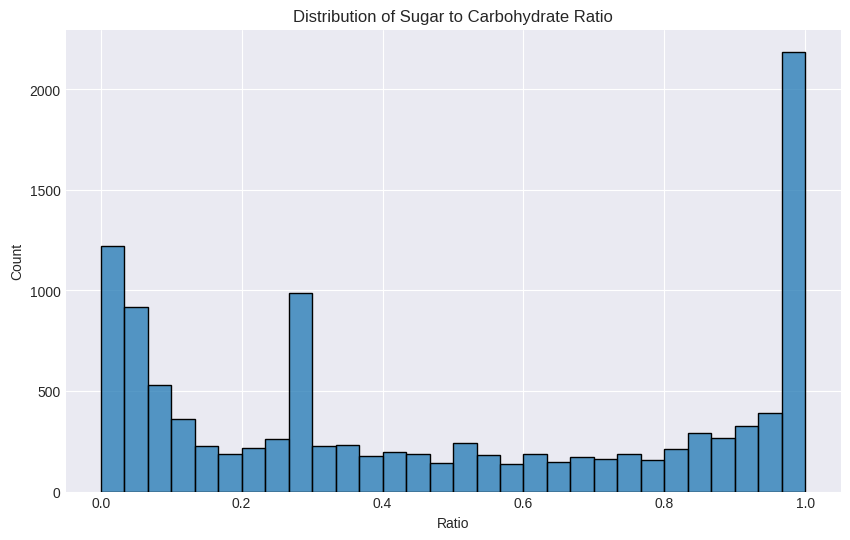

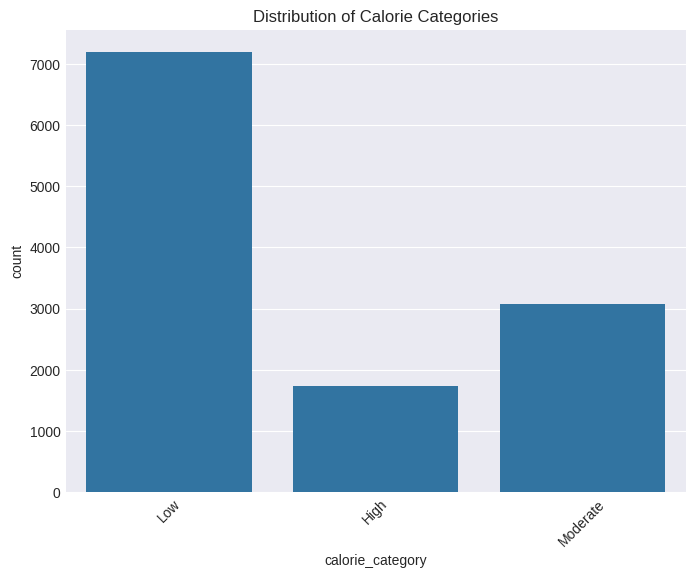

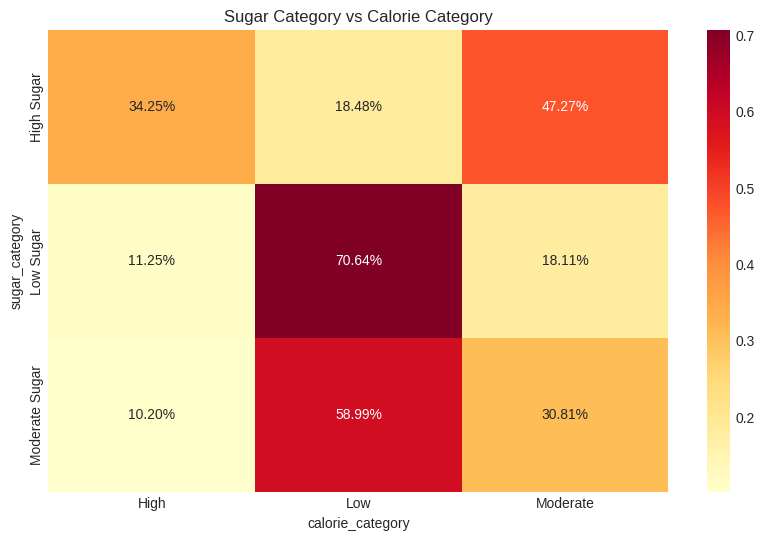

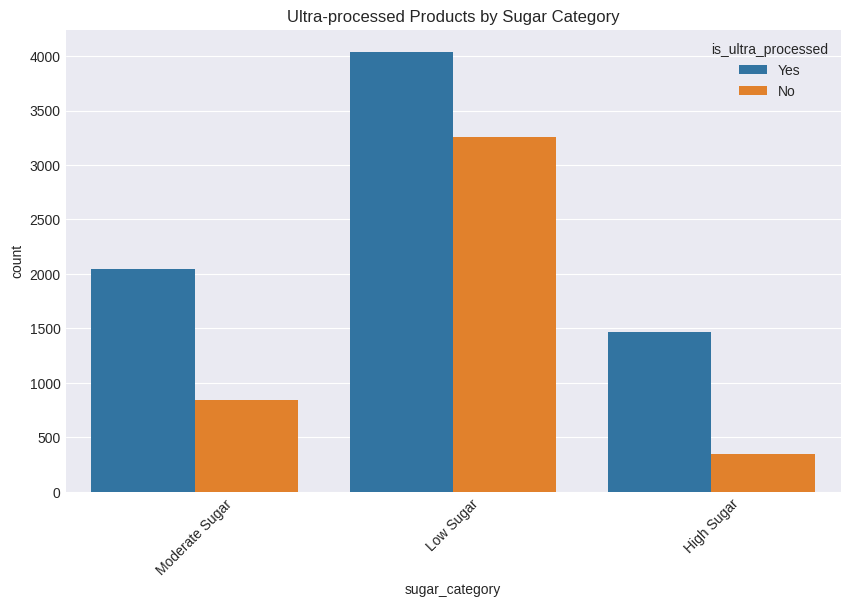

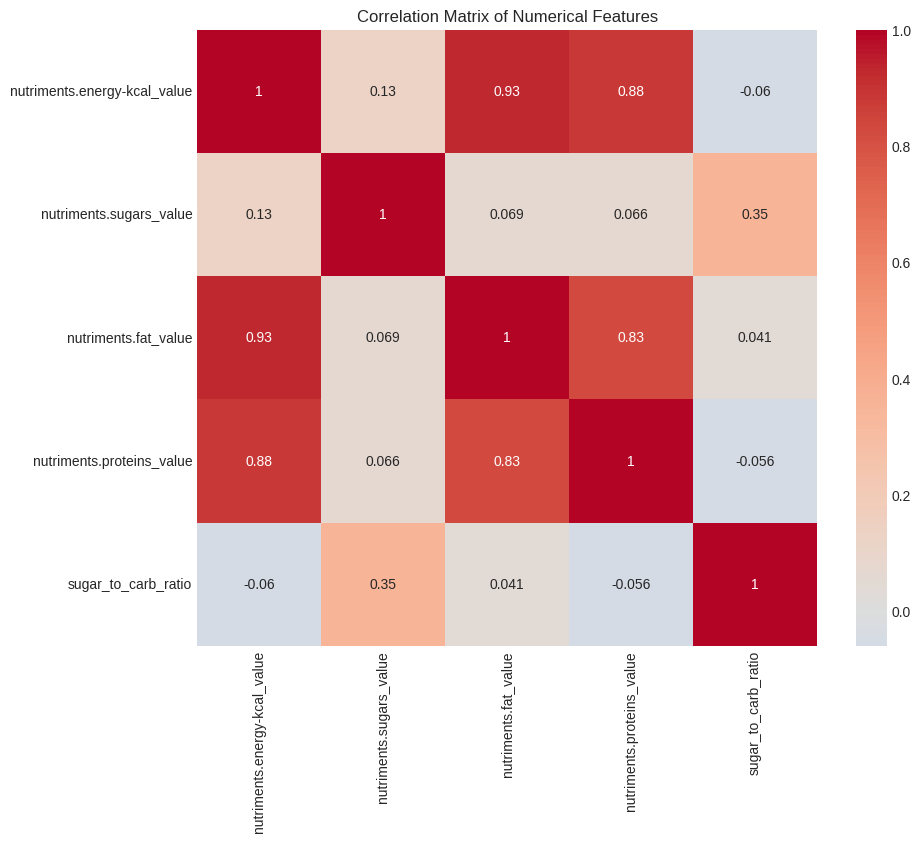


Feature engineering completed!

New columns added:
- sugar_to_carb_ratio
- calorie_category
- sugar_category
- is_ultra_processed

Engineered data saved to: engineered_chocolate_data.csv

Sample of engineered data:
   sugar_to_carb_ratio calorie_category  sugar_category is_ultra_processed
0             0.333333              Low  Moderate Sugar                Yes
1             0.436170              Low       Low Sugar                Yes
2             0.273333              Low       Low Sugar                 No
3             0.273333              Low       Low Sugar                 No
4                  NaN              Low       Low Sugar                Yes


In [6]:
import pandas as pd
import numpy as np
from typing import List, Dict
import matplotlib.pyplot as plt
import seaborn as sns

class ChocolateFeatureEngineer:
    def __init__(self, file_path: str):
        """
        Initialize Feature Engineer with dataset

        Parameters:
        - file_path: Path to the cleaned CSV file
        """
        self.df = pd.read_csv(file_path)
        self.required_columns = [
            'nutriments.energy-kcal_value',
            'nutriments.energy-kj_value',
            'nutriments.carbohydrates_value',
            'nutriments.sugars_value',
            'nutriments.fat_value',
            'nutriments.saturated-fat_value',
            'nutriments.proteins_value',
            'nutriments.fiber_value',
            'nutriments.salt_value',
            'nutriments.sodium_value',
            'nutriments.nova-group',
            'nutriments.nutrition-score-fr',
            'nutriments.fruits-vegetables-nuts-estimate-from-ingredients_100g'
        ]

    def validate_required_columns(self) -> bool:
        """Validate presence of required columns"""
        missing_columns = [col for col in self.required_columns
                         if col not in self.df.columns]

        if missing_columns:
            print("Missing required columns:")
            for col in missing_columns:
                print(f"- {col}")
            return False
        return True

    def calculate_sugar_to_carb_ratio(self) -> None:
        """Calculate ratio between total sugar and total carbohydrates"""
        try:
            self.df['sugar_to_carb_ratio'] = (
                self.df['nutriments.sugars_value'] /
                self.df['nutriments.carbohydrates_value']
            )

            # Handle division by zero and invalid values
            self.df['sugar_to_carb_ratio'] = self.df['sugar_to_carb_ratio'].replace(
                [np.inf, -np.inf], np.nan
            )
            self.df['sugar_to_carb_ratio'] = self.df['sugar_to_carb_ratio'].clip(0, 1)

            print("Sugar to carbohydrate ratio statistics:")
            print(self.df['sugar_to_carb_ratio'].describe())

        except Exception as e:
            print(f"Error calculating sugar to carb ratio: {e}")

    def categorize_calories(self) -> None:
        """Categorize products based on calorie content"""
        try:
            # Define calorie boundaries (per 100g)
            low_cal = 300
            high_cal = 500

            conditions = [
                (self.df['nutriments.energy-kcal_value'] <= low_cal),
                (self.df['nutriments.energy-kcal_value'] > low_cal) &
                (self.df['nutriments.energy-kcal_value'] <= high_cal),
                (self.df['nutriments.energy-kcal_value'] > high_cal)
            ]
            choices = ['Low', 'Moderate', 'High']

            self.df['calorie_category'] = np.select(
                conditions, choices, default='Unknown'
            )

            print("\nCalorie category distribution:")
            print(self.df['calorie_category'].value_counts())

        except Exception as e:
            print(f"Error categorizing calories: {e}")

    def categorize_sugar(self) -> None:
        """Categorize products based on sugar content"""
        try:
            # Define sugar boundaries (per 100g)
            low_sugar = 5
            high_sugar = 22.5

            conditions = [
                (self.df['nutriments.sugars_value'] <= low_sugar),
                (self.df['nutriments.sugars_value'] > low_sugar) &
                (self.df['nutriments.sugars_value'] <= high_sugar),
                (self.df['nutriments.sugars_value'] > high_sugar)
            ]
            choices = ['Low Sugar', 'Moderate Sugar', 'High Sugar']

            self.df['sugar_category'] = np.select(
                conditions, choices, default='Unknown'
            )

            print("\nSugar category distribution:")
            print(self.df['sugar_category'].value_counts())

        except Exception as e:
            print(f"Error categorizing sugar content: {e}")

    def identify_ultra_processed(self) -> None:
        """Flag ultra-processed products"""
        try:
            self.df['is_ultra_processed'] = np.where(
                self.df['nutriments.nova-group'] == 4, 'Yes', 'No'
            )

            print("\nUltra-processed products distribution:")
            print(self.df['is_ultra_processed'].value_counts())

        except Exception as e:
            print(f"Error identifying ultra-processed products: {e}")

    def visualize_features(self) -> None:
        """Create visualizations for the engineered features"""
        # Set up the plotting style
        plt.style.use('seaborn-v0_8-darkgrid') # Use an available style

        # 1. Sugar to Carb Ratio Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='sugar_to_carb_ratio', bins=30)
        plt.title('Distribution of Sugar to Carbohydrate Ratio')
        plt.xlabel('Ratio')
        plt.ylabel('Count')
        plt.show()

        # 2. Calorie Category Distribution
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.df, x='calorie_category')
        plt.title('Distribution of Calorie Categories')
        plt.xticks(rotation=45)
        plt.show()

        # 3. Sugar Category vs Calorie Category
        plt.figure(figsize=(10, 6))
        sns.heatmap(
            pd.crosstab(
                self.df['sugar_category'],
                self.df['calorie_category'],
                normalize='index'
            ),
            annot=True,
            fmt='.2%',
            cmap='YlOrRd'
        )
        plt.title('Sugar Category vs Calorie Category')
        plt.show()

        # 4. Ultra-processed Products by Sugar Category
        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=self.df,
            x='sugar_category',
            hue='is_ultra_processed'
        )
        plt.title('Ultra-processed Products by Sugar Category')
        plt.xticks(rotation=45)
        plt.show()

    def analyze_correlations(self) -> None:
        """Analyze correlations between numerical features"""
        numerical_columns = [
            'nutriments.energy-kcal_value',
            'nutriments.sugars_value',
            'nutriments.fat_value',
            'nutriments.proteins_value',
            'sugar_to_carb_ratio'
        ]

        correlation_matrix = self.df[numerical_columns].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0
        )
        plt.title('Correlation Matrix of Numerical Features')
        plt.show()

    def engineer_features(self) -> pd.DataFrame:
        """Perform complete feature engineering process"""
        print("Starting feature engineering process...")

        # Validate required columns
        if not self.validate_required_columns():
            raise ValueError("Missing required columns in dataset")

        # Calculate derived features
        self.calculate_sugar_to_carb_ratio()
        self.categorize_calories()
        self.categorize_sugar()
        self.identify_ultra_processed()

        # Create visualizations
        self.visualize_features()
        self.analyze_correlations()

        print("\nFeature engineering completed!")
        print("\nNew columns added:")
        print("- sugar_to_carb_ratio")
        print("- calorie_category")
        print("- sugar_category")
        print("- is_ultra_processed")

        return self.df

    def save_engineered_data(self, output_path: str) -> None:
        """
        Save engineered dataset

        Parameters:
        - output_path: Path where engineered data will be saved
        """
        self.df.to_csv(output_path, index=False)
        print(f"\nEngineered data saved to: {output_path}")

def main():
    # Initialize feature engineer
    engineer = ChocolateFeatureEngineer('cleaned_chocolate_data.csv')

    # Perform feature engineering
    engineered_df = engineer.engineer_features()

    # Save engineered data
    engineer.save_engineered_data('engineered_chocolate_data.csv')

    # Print sample of engineered data
    print("\nSample of engineered data:")
    print(engineered_df[['sugar_to_carb_ratio', 'calorie_category',
                        'sugar_category', 'is_ultra_processed']].head())

if __name__ == "__main__":
    main()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

class ChocolateEDA:
    def __init__(self, file_path: str):
        """
        Initialize EDA with dataset

        Parameters:
        - file_path: Path to the engineered dataset
        """
        self.df = pd.read_csv(file_path)
        self.numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        plt.style.use('seaborn-v0_8-darkgrid') # Use an available style

    def dataset_overview(self) -> None:
        """Provide overview of the dataset"""
        print("Dataset Overview:")
        print("-" * 50)
        print(f"Shape: {self.df.shape}")
        print("\nColumns:", self.df.columns.tolist())
        print("\nData Types:")
        print(self.df.dtypes)
        print("\nMissing Values:")
        print(self.df.isnull().sum()[self.df.isnull().sum() > 0])

    def analyze_categorical_distributions(self) -> None:
        """Analyze distributions of categorical variables"""
        categorical_cols = [
            'calorie_category',
            'sugar_category',
            'is_ultra_processed'
        ]

        fig = make_subplots(
            rows=2,
            cols=2,
            subplot_titles=categorical_cols + ['NOVA Group Distribution'],
            specs=[[{}, {}], [{}, {"type": "domain"}]] # Specify subplot types
        )

        # Add bar charts for each categorical variable
        for idx, col in enumerate(categorical_cols, 1):
            counts = self.df[col].value_counts()
            fig.add_trace(
                go.Bar(
                    x=counts.index,
                    y=counts.values,
                    name=col
                ),
                row=(idx-1)//2 + 1,
                col=(idx-1)%2 + 1
            )

        # Add pie chart for NOVA groups
        nova_counts = self.df['nutriments.nova-group'].value_counts()
        fig.add_trace(
            go.Pie(
                labels=nova_counts.index,
                values=nova_counts.values,
                name='NOVA Groups'
            ),
            row=2,
            col=2
        )

        fig.update_layout(
            height=800,
            title_text="Distribution of Categorical Variables",
            showlegend=False
        )
        fig.show()

    def analyze_numerical_distributions(self) -> None:
        """Analyze distributions of key numerical variables"""
        numerical_cols = [
            'nutriments.energy-kcal_value',
            'nutriments.sugars_value',
            'nutriments.carbohydrates_value',
            'sugar_to_carb_ratio'
        ]

        fig = make_subplots(
            rows=2,
            cols=2,
            subplot_titles=numerical_cols
        )

        for idx, col in enumerate(numerical_cols, 1):
            fig.add_trace(
                go.Histogram(
                    x=self.df[col],
                    name=col,
                    nbinsx=30
                ),
                row=(idx-1)//2 + 1,
                col=(idx-1)%2 + 1
            )

        fig.update_layout(
            height=800,
            title_text="Distribution of Numerical Variables"
        )
        fig.show()

    def analyze_brand_statistics(self) -> None:
        """Analyze nutritional statistics by brand"""
        # Calculate average nutritional values by brand
        brand_stats = self.df.groupby('brands').agg({
            'nutriments.energy-kcal_value': 'mean',
            'nutriments.sugars_value': 'mean',
            'nutriments.fat_value': 'mean',
            'sugar_to_carb_ratio': 'mean',
            'brands': 'count'
        }).rename(columns={'brands': 'product_count'})

        # Get top 10 brands by product count
        top_brands = brand_stats.nlargest(10, 'product_count')

        # Create visualization
        fig = make_subplots(
            rows=2,
            cols=2,
            subplot_titles=[
                'Average Calories',
                'Average Sugars',
                'Average Fat',
                'Average Sugar-to-Carb Ratio'
            ]
        )

        metrics = [
            'nutriments.energy-kcal_value',
            'nutriments.sugars_value',
            'nutriments.fat_value',
            'sugar_to_carb_ratio'
        ]

        for idx, metric in enumerate(metrics, 1):
            fig.add_trace(
                go.Bar(
                    x=top_brands.index,
                    y=top_brands[metric],
                    name=metric
                ),
                row=(idx-1)//2 + 1,
                col=(idx-1)%2 + 1
            )

        fig.update_layout(
            height=1000,
            title_text="Nutritional Analysis by Top 10 Brands",
            showlegend=False
        )
        fig.show()

    def analyze_correlations(self) -> None:
        """Analyze correlations between numerical variables"""
        # Select relevant numerical columns
        correlation_cols = [
            'nutriments.energy-kcal_value',
            'nutriments.sugars_value',
            'nutriments.carbohydrates_value',
            'nutriments.fat_value',
            'nutriments.proteins_value',
            'sugar_to_carb_ratio'
        ]

        # Calculate correlation matrix
        corr_matrix = self.df[correlation_cols].corr()

        # Create heatmap
        fig = go.Figure(data=go.Heatmap(
            z=corr_matrix,
            x=correlation_cols,
            y=correlation_cols,
            text=np.round(corr_matrix, 2),
            texttemplate='%{text}',
            textfont={"size": 10},
            hoverongaps=False,
            colorscale='RdBu'
        ))

        fig.update_layout(
            title='Correlation Matrix of Nutritional Values',
            height=800
        )
        fig.show()

    def analyze_nova_groups(self) -> None:
        """Analyze nutritional values across NOVA groups"""
        # Calculate average nutritional values by NOVA group
        nova_stats = self.df.groupby('nutriments.nova-group').agg({
            'nutriments.energy-kcal_value': 'mean',
            'nutriments.sugars_value': 'mean',
            'nutriments.fat_value': 'mean',
            'sugar_to_carb_ratio': 'mean'
        })

        # Create visualization
        fig = make_subplots(
            rows=2,
            cols=2,
            subplot_titles=[
                'Average Calories by NOVA Group',
                'Average Sugars by NOVA Group',
                'Average Fat by NOVA Group',
                'Average Sugar-to-Carb Ratio by NOVA Group'
            ]
        )

        metrics = [
            'nutriments.energy-kcal_value',
            'nutriments.sugars_value',
            'nutriments.fat_value',
            'sugar_to_carb_ratio'
        ]

        for idx, metric in enumerate(metrics, 1):
            fig.add_trace(
                go.Bar(
                    x=nova_stats.index,
                    y=nova_stats[metric],
                    name=metric
                ),
                row=(idx-1)//2 + 1,
                col=(idx-1)%2 + 1
            )

        fig.update_layout(
            height=1000,
            title_text="Nutritional Analysis by NOVA Groups",
            showlegend=False
        )
        fig.show()

    def create_scatter_plots(self) -> None:
        """Create scatter plots to explore relationships"""
        fig = make_subplots(
            rows=2,
            cols=2,
            subplot_titles=[
                'Calories vs Sugars',
                'Calories vs Fat',
                'Sugars vs Fat',
                'Sugars vs Sugar-to-Carb Ratio'
            ]
        )

        # Calories vs Sugars
        fig.add_trace(
            go.Scatter(
                x=self.df['nutriments.energy-kcal_value'],
                y=self.df['nutriments.sugars_value'],
                mode='markers',
                opacity=0.6,
                name='Calories vs Sugars'
            ),
            row=1,
            col=1
        )

        # Calories vs Fat
        fig.add_trace(
            go.Scatter(
                x=self.df['nutriments.energy-kcal_value'],
                y=self.df['nutriments.fat_value'],
                mode='markers',
                opacity=0.6,
                name='Calories vs Fat'
            ),
            row=1,
            col=2
        )

        # Sugars vs Fat
        fig.add_trace(
            go.Scatter(
                x=self.df['nutriments.sugars_value'],
                y=self.df['nutriments.fat_value'],
                mode='markers',
                opacity=0.6,
                name='Sugars vs Fat'
            ),
            row=2,
            col=1
        )

        # Sugars vs Sugar-to-Carb Ratio
        fig.add_trace(
            go.Scatter(
                x=self.df['nutriments.sugars_value'],
                y=self.df['sugar_to_carb_ratio'],
                mode='markers',
                opacity=0.6,
                name='Sugars vs Ratio'
            ),
            row=2,
            col=2
        )

        fig.update_layout(
            height=1000,
            title_text="Relationships between Nutritional Values",
            showlegend=False
        )
        fig.show()

    def generate_summary_report(self) -> None:
        """Generate a summary report of key findings"""
        print("Summary Report:")
        print("-" * 50)

        # Dataset statistics
        print("\n1. Dataset Statistics:")
        print(f"Total products: {len(self.df)}")
        print(f"Number of brands: {self.df['brands'].nunique()}")

        # Category distributions
        print("\n2. Category Distributions:")
        print("\nCalorie Categories:")
        print(self.df['calorie_category'].value_counts())
        print("\nSugar Categories:")
        print(self.df['sugar_category'].value_counts())
        print("\nNOVA Groups:")
        print(self.df['nutriments.nova-group'].value_counts())

        # Nutritional averages
        print("\n3. Average Nutritional Values:")
        nutritional_cols = [
            'nutriments.energy-kcal_value',
            'nutriments.sugars_value',
            'nutriments.fat_value',
            'nutriments.proteins_value'
        ]
        print(self.df[nutritional_cols].mean())

        # Top brands
        print("\n4. Top 5 Brands by Product Count:")
        print(self.df['brands'].value_counts().head())

    def perform_complete_eda(self) -> None:
        """Perform complete EDA process"""
        print("Starting Exploratory Data Analysis...")

        # Dataset overview
        self.dataset_overview()

        # Categorical analysis
        self.analyze_categorical_distributions()

        # Numerical analysis
        self.analyze_numerical_distributions()

        # Brand analysis
        self.analyze_brand_statistics()

        # Correlation analysis
        self.analyze_correlations()

        # NOVA group analysis
        self.analyze_nova_groups()

        # Relationship analysis
        self.create_scatter_plots()

        # Generate summary report
        self.generate_summary_report()

        print("\nEDA completed!")

def main():
    # Initialize EDA
    eda = ChocolateEDA('engineered_chocolate_data.csv')

    # Perform complete EDA
    eda.perform_complete_eda()

if __name__ == "__main__":
    main()

Starting Exploratory Data Analysis...
Dataset Overview:
--------------------------------------------------
Shape: (12000, 71)

Columns: ['code', 'product_name', 'brands', 'nutriments.carbohydrates', 'nutriments.carbohydrates_100g', 'nutriments.carbohydrates_serving', 'nutriments.carbohydrates_unit', 'nutriments.carbohydrates_value', 'nutriments.energy', 'nutriments.energy-kcal', 'nutriments.energy-kcal_100g', 'nutriments.energy-kcal_serving', 'nutriments.energy-kcal_unit', 'nutriments.energy-kcal_value', 'nutriments.energy-kcal_value_computed', 'nutriments.energy-kj', 'nutriments.energy-kj_100g', 'nutriments.energy-kj_unit', 'nutriments.energy-kj_value', 'nutriments.energy-kj_value_computed', 'nutriments.energy_100g', 'nutriments.energy_serving', 'nutriments.energy_unit', 'nutriments.energy_value', 'nutriments.fat', 'nutriments.fat_100g', 'nutriments.fat_serving', 'nutriments.fat_unit', 'nutriments.fat_value', 'nutriments.fiber', 'nutriments.fiber_100g', 'nutriments.fiber_unit', 'nutri

Summary Report:
--------------------------------------------------

1. Dataset Statistics:
Total products: 12000
Number of brands: 4044

2. Category Distributions:

Calorie Categories:
calorie_category
Low         7194
Moderate    3069
High        1737
Name: count, dtype: int64

Sugar Categories:
sugar_category
Low Sugar         7295
Moderate Sugar    2892
High Sugar        1813
Name: count, dtype: int64

NOVA Groups:
nutriments.nova-group
4.0    7548
3.0    2631
1.0    1321
2.0     500
Name: count, dtype: int64

3. Average Nutritional Values:
nutriments.energy-kcal_value    276.295968
nutriments.sugars_value          10.847914
nutriments.fat_value             14.338900
nutriments.proteins_value         7.164126
dtype: float64

4. Top 5 Brands by Product Count:
brands
Hacendado    1021
Tesco         264
Carrefour     144
Bjorg          99
Heinz          92
Name: count, dtype: int64

EDA completed!


In [2]:
import pandas as pd
import sqlite3
import logging
from typing import List, Dict


class ChocolateDBManager:
    def __init__(self, db_name: str):
        """
        Initialize database manager

        Parameters:
        - db_name: Name of the SQLite database file
        """
        self.db_name = db_name

        # Set up logging
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

    def create_connection(self):
        """Create database connection"""
        try:
            conn = sqlite3.connect(self.db_name)
            return conn
        except sqlite3.Error as e:
            self.logger.error(f"Error connecting to database: {e}")
            raise

    def create_tables(self, conn: sqlite3.Connection):
        """
        Create database tables

        Parameters:
        - conn: Database connection
        """
        try:
            cursor = conn.cursor()

            # Create product_info table
            cursor.execute('''
                CREATE TABLE IF NOT EXISTS product_info (
                    product_code TEXT PRIMARY KEY,
                    product_name TEXT,
                    brand TEXT
                )
            ''')

            # Create nutrient_info table
            cursor.execute('''
                CREATE TABLE IF NOT EXISTS nutrient_info (
                    product_code TEXT PRIMARY KEY,
                    energy_kcal_value FLOAT,
                    energy_kj_value FLOAT,
                    carbohydrates_value FLOAT,
                    sugars_value FLOAT,
                    fat_value FLOAT,
                    saturated_fat_value FLOAT,
                    proteins_value FLOAT,
                    fiber_value FLOAT,
                    salt_value FLOAT,
                    sodium_value FLOAT,
                    fruits_vegetables_nuts_estimate FLOAT,
                    nutrition_score_fr INTEGER,
                    nova_group INTEGER,
                    FOREIGN KEY (product_code) REFERENCES product_info (product_code)
                )
            ''')

            # Create derived_metrics table
            cursor.execute('''
                CREATE TABLE IF NOT EXISTS derived_metrics (
                    product_code TEXT PRIMARY KEY,
                    sugar_to_carb_ratio FLOAT,
                    calorie_category TEXT,
                    sugar_category TEXT,
                    is_ultra_processed TEXT,
                    FOREIGN KEY (product_code) REFERENCES product_info (product_code)
                )
            ''')

            conn.commit()
            self.logger.info("Tables created successfully")

        except sqlite3.Error as e:
            self.logger.error(f"Error creating tables: {e}")
            raise

    def drop_tables(self, conn: sqlite3.Connection):
        """
        Drop existing tables

        Parameters:
        - conn: Database connection
        """
        try:
            cursor = conn.cursor()

            # Drop tables if they exist
            tables = ['derived_metrics', 'nutrient_info', 'product_info']
            for table in tables:
                cursor.execute(f"DROP TABLE IF EXISTS {table}")

            conn.commit()
            self.logger.info("Existing tables dropped successfully")

        except sqlite3.Error as e:
            self.logger.error(f"Error dropping tables: {e}")
            raise

    def insert_data(self, df: pd.DataFrame):
        """
        Insert data into database tables

        Parameters:
        - df: DataFrame containing the data
        """
        conn = self.create_connection()

        try:
            # Drop and recreate tables
            self.drop_tables(conn)
            self.create_tables(conn)

            cursor = conn.cursor()

            # Remove duplicates based on product_code
            df = df.drop_duplicates(subset=['code'])

            # Insert data row by row
            for _, row in df.iterrows():
                try:
                    # Insert into product_info
                    cursor.execute('''
                        INSERT INTO product_info (product_code, product_name, brand)
                        VALUES (?, ?, ?)
                    ''', (
                        str(int(row['code'])),
                        row['product_name'],
                        row['brands']
                    ))

                    # Insert into nutrient_info
                    cursor.execute('''
                        INSERT INTO nutrient_info (
                            product_code,
                            energy_kcal_value,
                            energy_kj_value,
                            carbohydrates_value,
                            sugars_value,
                            fat_value,
                            saturated_fat_value,
                            proteins_value,
                            fiber_value,
                            salt_value,
                            sodium_value,
                            fruits_vegetables_nuts_estimate,
                            nutrition_score_fr,
                            nova_group
                        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                    ''', (
                        str(int(row['code'])),
                        row['nutriments.energy-kcal_value'],
                        row['nutriments.energy-kj_value'],
                        row['nutriments.carbohydrates_value'],
                        row['nutriments.sugars_value'],
                        row['nutriments.fat_value'],
                        row['nutriments.saturated-fat_value'],
                        row['nutriments.proteins_value'],
                        row['nutriments.fiber_value'],
                        row['nutriments.salt_value'],
                        row['nutriments.sodium_value'],
                        row['nutriments.fruits-vegetables-nuts-estimate-from-ingredients_100g'],
                        row['nutriments.nutrition-score-fr'],
                        row['nutriments.nova-group']
                    ))

                    # Insert into derived_metrics
                    cursor.execute('''
                        INSERT INTO derived_metrics (
                            product_code,
                            sugar_to_carb_ratio,
                            calorie_category,
                            sugar_category,
                            is_ultra_processed
                        ) VALUES (?, ?, ?, ?, ?)
                    ''', (
                        str(int(row['code'])),
                        row['sugar_to_carb_ratio'],
                        row['calorie_category'],
                        row['sugar_category'],
                        row['is_ultra_processed']
                    ))

                except sqlite3.Error as e:
                    self.logger.warning(f"Error inserting row {row['code']}: {e}")
                    continue

            conn.commit()
            self.logger.info("Data inserted successfully")

        except Exception as e:
            conn.rollback()
            self.logger.error(f"Error inserting data: {e}")
            raise
        finally:
            conn.close()

    def create_indexes(self):
        """Create indexes for better query performance"""
        conn = self.create_connection()

        try:
            cursor = conn.cursor()

            # Create indexes
            indexes = [
                'CREATE INDEX IF NOT EXISTS idx_brand ON product_info(brand)',
                'CREATE INDEX IF NOT EXISTS idx_calorie_category ON derived_metrics(calorie_category)',
                'CREATE INDEX IF NOT EXISTS idx_sugar_category ON derived_metrics(sugar_category)',
                'CREATE INDEX IF NOT EXISTS idx_nova_group ON nutrient_info(nova_group)'
            ]

            for index_sql in indexes:
                cursor.execute(index_sql)

            conn.commit()
            self.logger.info("Indexes created successfully")

        except sqlite3.Error as e:
            self.logger.error(f"Error creating indexes: {e}")
            raise
        finally:
            conn.close()

    def verify_data(self):
        """Verify data insertion by running test queries"""
        conn = self.create_connection()

        try:
            cursor = conn.cursor()

            # Test queries
            queries = {
                'Product count': 'SELECT COUNT(*) FROM product_info',
                'Nutrient records': 'SELECT COUNT(*) FROM nutrient_info',
                'Derived metrics': 'SELECT COUNT(*) FROM derived_metrics',
                'Sample join': '''
                    SELECT p.product_name, n.energy_kcal_value, d.calorie_category
                    FROM product_info p
                    JOIN nutrient_info n ON p.product_code = n.product_code
                    JOIN derived_metrics d ON p.product_code = d.product_code
                    LIMIT 5
                '''
            }

            for description, query in queries.items():
                cursor.execute(query)
                results = cursor.fetchall()
                self.logger.info(f"\n{description}:")
                for row in results:
                    self.logger.info(row)

        except sqlite3.Error as e:
            self.logger.error(f"Error verifying data: {e}")
            raise
        finally:
            conn.close()

def main():
    # Load the engineered dataset
    df = pd.read_csv('engineered_chocolate_data.csv')

    # Initialize database manager
    db_manager = ChocolateDBManager('chocolate_db.sqlite')

    try:
        # Insert data
        db_manager.insert_data(df)

        # Create indexes
        db_manager.create_indexes()

        # Verify data
        db_manager.verify_data()

    except Exception as e:
        print(f"Error in database operations: {e}")

if __name__ == "__main__":
    main()

In [10]:
!pip install streamlit streamlit_option_menu  # installing streamlit and streamlit_option_menu packages

In [11]:
#my file name is app.py you can change it to anything you want




%%writefile app.py




# ==========================================================
# 🍫 ChocoCrunch Analytics - Complete Streamlit App
# ==========================================================
import streamlit as st
import pandas as pd
import sqlite3
import numpy as np
import plotly.express as px

st.set_page_config(page_title="🍫 ChocoCrunch Analytics", layout="wide")
st.title("🍫 ChocoCrunch Analytics Dashboard")

# ----------------------------------------------------------
# 1️⃣ CREATE / LOAD SAMPLE DATA
# ----------------------------------------------------------
# You can replace this with CSV load if available
@st.cache_data
def create_sample_data():
    # product_info
    df_product = pd.DataFrame({
        "code": range(1, 21),
        "product_name": [f"Choco_{i}" for i in range(1, 21)],
        "brand": np.random.choice(["BrandA","BrandB","BrandC","BrandD"], 20)
    })

    # nutrient_info
    df_nutrient = pd.DataFrame({
        "code": df_product["code"],
        "product_name": df_product["product_name"],
        "energy_kcal_value": np.random.randint(100, 600, 20),
        "sugars_value": np.random.randint(5, 50, 20),
        "fat_value": np.random.randint(1, 30, 20),
        "carbohydrates_value": np.random.randint(10, 60, 20),
        "sodium_value": np.random.rand(20),
        "fruits_vegetables_nuts_value": np.random.randint(0, 5, 20),
        "nova_group": np.random.choice(["Ultra-Processed","Processed","Unprocessed"], 20)
    })

    # derived_metrics
    df_derived = pd.DataFrame({
        "code": df_product["code"],
        "product_name": df_product["product_name"],
        "calorie_category": np.random.choice(["Low Calorie","Medium Calorie","High Calorie"], 20),
        "sugar_category": np.random.choice(["Low Sugar","Medium Sugar","High Sugar"], 20),
        "sugar_to_carb_ratio": np.random.rand(20),
        "nova_group": df_nutrient["nova_group"]
    })

    return df_product, df_nutrient, df_derived

df_product, df_nutrient, df_derived = create_sample_data()

# ----------------------------------------------------------
# 2️⃣ CREATE SQLITE CONNECTION
# ----------------------------------------------------------
@st.cache_resource
def get_connection():
    conn = sqlite3.connect(":memory:", check_same_thread=False)
    df_product.to_sql("product_info", conn, index=False, if_exists="replace")
    df_nutrient.to_sql("nutrient_info", conn, index=False, if_exists="replace")
    df_derived.to_sql("derived_metrics", conn, index=False, if_exists="replace")
    return conn

conn = get_connection()

# ----------------------------------------------------------
# 3️⃣ HELPER FUNCTION TO RUN SQL
# ----------------------------------------------------------
def run_query(sql):
    try:
        return pd.read_sql_query(sql, conn)
    except Exception as e:
        return pd.DataFrame({"_error": [str(e)]})

# ----------------------------------------------------------
# 4️⃣ 27 SQL QUERIES
# ----------------------------------------------------------
queries = [
    # --- product_info ---
    ("Count products per brand","SELECT brand, COUNT(*) AS product_count FROM product_info GROUP BY brand;"),
    ("Count unique products per brand","SELECT brand, COUNT(DISTINCT product_name) AS unique_products FROM product_info GROUP BY brand;"),
    ("Top 5 brands by product count","SELECT brand, COUNT(*) AS total_products FROM product_info GROUP BY brand ORDER BY total_products DESC LIMIT 5;"),
    ("Products with missing product name","SELECT * FROM product_info WHERE product_name IS NULL OR TRIM(product_name) = '';"),
    ("Number of unique brands","SELECT COUNT(DISTINCT brand) AS unique_brands FROM product_info;"),
    ("Products with code starting with '3'","SELECT * FROM product_info WHERE CAST(code AS TEXT) LIKE '3%';"),
    # --- nutrient_info ---
    ("Top 10 products with highest energy_kcal_value","SELECT product_name, energy_kcal_value FROM nutrient_info ORDER BY energy_kcal_value DESC LIMIT 10;"),
    ("Average sugars_value per nova_group","SELECT nova_group, AVG(sugars_value) AS avg_sugars FROM nutrient_info GROUP BY nova_group;"),
    ("Count products with fat_value > 20g","SELECT COUNT(*) AS high_fat_count FROM nutrient_info WHERE fat_value > 20;"),
    ("Average carbohydrates_value per product","SELECT product_name, AVG(carbohydrates_value) AS avg_carbohydrates FROM nutrient_info GROUP BY product_name;"),
    ("Products with sodium_value < 1g","SELECT product_name, sodium_value FROM nutrient_info WHERE sodium_value <1;"),
    ("Count products with non-zero fruits-vegetables-nuts content","SELECT COUNT(*) AS count_nonzero_fvn FROM nutrient_info WHERE fruits_vegetables_nuts_value > 0;"),
    ("Products with energy_kcal_value > 500","SELECT product_name, energy_kcal_value FROM nutrient_info WHERE energy_kcal_value > 500;"),
    # --- derived_metrics ---
    ("Count products per calorie_category","SELECT calorie_category, COUNT(*) AS product_count FROM derived_metrics GROUP BY calorie_category;"),
    ("Count of High Sugar products","SELECT COUNT(*) AS high_sugar_products FROM derived_metrics WHERE sugar_category = 'High Sugar';"),
    ("Average sugar_to_carb_ratio for High Calorie products","SELECT AVG(sugar_to_carb_ratio) AS avg_ratio_high_cal FROM derived_metrics WHERE calorie_category = 'High Calorie';"),
    ("Products that are both High Calorie and High Sugar","SELECT product_name FROM derived_metrics WHERE calorie_category = 'High Calorie' AND sugar_category = 'High Sugar';"),
    ("Number of products marked as ultra-processed","SELECT COUNT(*) AS ultra_processed_count FROM derived_metrics WHERE nova_group = 'Ultra-Processed';"),
    ("Products with sugar_to_carb_ratio > 0.7","SELECT product_name, sugar_to_carb_ratio FROM derived_metrics WHERE sugar_to_carb_ratio > 0.7;"),
    ("Average sugar_to_carb_ratio per calorie_category","SELECT calorie_category, AVG(sugar_to_carb_ratio) AS avg_ratio FROM derived_metrics GROUP BY calorie_category;"),
    # --- Join Queries ---
    ("Top 5 brands with most High Calorie products",
     "SELECT p.brand, COUNT(*) AS count_high_cal FROM product_info p JOIN derived_metrics d ON p.code = d.code WHERE d.calorie_category = 'High Calorie' GROUP BY p.brand ORDER BY count_high_cal DESC LIMIT 5;"),
    ("Average energy_kcal_value for each calorie_category",
     "SELECT d.calorie_category, AVG(n.energy_kcal_value) AS avg_energy FROM derived_metrics d JOIN nutrient_info n ON d.code = n.code GROUP BY d.calorie_category;"),
    ("Count of ultra-processed products per brand",
     "SELECT p.brand, COUNT(*) AS ultra_processed_count FROM product_info p JOIN derived_metrics d ON p.code = d.code WHERE d.nova_group = 'Ultra-Processed' GROUP BY p.brand;"),
    ("Products with High Sugar and High Calorie along with brand",
     "SELECT p.brand, p.product_name, d.sugar_category, d.calorie_category FROM product_info p JOIN derived_metrics d ON p.code = d.code WHERE d.sugar_category = 'High Sugar' AND d.calorie_category = 'High Calorie';"),
    ("Average sugar content per brand for ultra-processed products",
     "SELECT p.brand, AVG(n.sugars_value) AS avg_sugars FROM product_info p JOIN nutrient_info n ON p.code = n.code JOIN derived_metrics d ON p.code = d.code WHERE d.nova_group = 'Ultra-Processed' GROUP BY p.brand;"),
    ("Number of products with fruits/vegetables/nuts content in each calorie_category",
     "SELECT d.calorie_category, COUNT(*) AS count_with_fvn FROM nutrient_info n JOIN derived_metrics d ON n.code = d.code WHERE n.fruits_vegetables_nuts_value > 0 GROUP BY d.calorie_category;"),
    ("Top 5 products by sugar_to_carb_ratio with their calorie and sugar category",
     "SELECT p.product_name, d.sugar_to_carb_ratio, d.calorie_category, d.sugar_category FROM product_info p JOIN derived_metrics d ON p.code = d.code ORDER BY d.sugar_to_carb_ratio DESC LIMIT 5;")
]

# ----------------------------------------------------------
# 5️⃣ DISPLAY QUERIES
# ----------------------------------------------------------
st.header("🔢 SQL Queries (Question → Answer)")
for idx, (q_title, q_sql) in enumerate(queries, start=1):
    with st.expander(f"Q{idx}. {q_title}", expanded=False):
        st.code(q_sql.strip(), language="sql")
        df = run_query(q_sql)
        if "_error" in df.columns:
            st.error(df["_error"].iloc[0])
        elif df.empty:
            st.info("No rows returned.")
        else:
            st.dataframe(df, use_container_width=True)
            csv = df.to_csv(index=False).encode("utf-8")
            st.download_button(
                f"⬇️ Download Q{idx} Answer (CSV)",
                csv,
                file_name=f"Q{idx}_{q_title[:25].replace(' ', '_')}.csv",
                mime="text/csv"
            )

# ----------------------------------------------------------
# 6️⃣ EDA & VISUALIZATIONS
# ----------------------------------------------------------
st.header("📊 Exploratory Data Analysis (EDA)")

# Energy distribution
fig1 = px.histogram(df_nutrient, x="energy_kcal_value", nbins=20, title="Energy Distribution")
st.plotly_chart(fig1, use_container_width=True)

# Sugar vs Fat scatter
fig2 = px.scatter(df_nutrient, x="sugars_value", y="fat_value", color="nova_group", title="Sugar vs Fat by NOVA Group")
st.plotly_chart(fig2, use_container_width=True)

# Products per calorie category
fig3 = px.bar(df_derived, x="calorie_category", title="Products per Calorie Category", color="calorie_category")
st.plotly_chart(fig3, use_container_width=True)

# Sugar-to-Carb ratio by Calorie category
fig4 = px.box(df_derived, x="calorie_category", y="sugar_to_carb_ratio", color="calorie_category",
              title="Sugar-to-Carb Ratio Distribution")
st.plotly_chart(fig4, use_container_width=True)

# Fat distribution
fig5 = px.histogram(df_nutrient, x="fat_value", nbins=20, title="Fat Distribution")
st.plotly_chart(fig5, use_container_width=True)

# Sugar content by NOVA group
fig6 = px.box(df_nutrient, x="nova_group", y="sugars_value", color="nova_group", title="Sugar by NOVA Group")
st.plotly_chart(fig6, use_container_width=True)

# Scatter carbs vs sugar
fig7 = px.scatter(df_nutrient, x="carbohydrates_value", y="sugars_value", color="nova_group", title="Carbs vs Sugar")
st.plotly_chart(fig7, use_container_width=True)

# ----------------------------------------------------------
st.markdown("---")
st.caption("✅ ChocoCrunch Analytics | Streamlit + SQLite + EDA Visualization Dashboard")


Overwriting app.py


In [12]:
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

--2025-11-17 09:14:29--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2025-11-17 09:14:29--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-17T10%3A11%3A24Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-17

In [13]:
!streamlit run /content/app.py &>/content/logs.txt &  # here instead of app.py please rename with your file name

In [14]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://breakfast-nissan-catalogs-turns.trycloudflare.com
